# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [1]:
# Import all popular libraries include NumPy, Pandas, Seaborn, Plotly and Skikit learn
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import matplotlib.pyplot as plt

# Library for pre-processing steps for normalizing numerical variables and encoding categorical variables
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
# Column Transformer methods to apply multiple transformations across variables in the dataset
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
# Libraries to split the dataset into training and test. GridsearchCV for cross validation
from sklearn.model_selection import train_test_split, GridSearchCV
# Popular models like Linnear Regression, Lasso and Ridge 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn import set_config
set_config(display="diagram")


# hide warnings
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

from sklearn import set_config
set_config(display="diagram") #setting this will display your pipelines as seen above

In [2]:
print("Completed importing libraries and modules into the Notebook:All Done")

Completed importing libraries and modules into the Notebook:All Done


### 1. Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [3]:
# Read the given CSV file with data pertaining to sale of car 
df = pd.read_csv('vehicles.csv')

### 1.1. Determine Shape and Column Types 
    As can be inferred from the info() and shape. The dataset contains 426880 rows and 18 columns. 4 are numericals where as the rest are categorical values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
df.shape

(426880, 18)

### 1.2 Desribe Dataframe to get key stats for the dataframe 

    As can be inferred from the describe call on the dataframe , the year has a low value of 1900 and high of 2022. On the initial viewing of data it does seem like the data way back in the history might not be relevant for determining the price of the car. The ID column seems to be the system key and not very useful for analysis

In [6]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [7]:
df.head(200)
# Check the sample 200 rows at the top leveraging the head function. From the cursory look there are a lot of rows with majority columns NUL
# Example : ID: 7222695916,7218891961
#df["type"].value_counts()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,7316711193,birmingham,34995,2012.0,dodge,charger limousine,NaN,NaN,gas,41000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,al
196,7316707537,birmingham,3200,2005.0,ford,focus,good,4 cylinders,gas,189886.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,al
197,7316702941,birmingham,3495,1999.0,ford,windstar,good,6 cylinders,gas,135448.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,al
198,7316695553,birmingham,6500,2002.0,ford,sport trac,good,6 cylinders,gas,114775.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,al


### 1.3 Null Value Analysis  

    When Verifying percentage of Null Value spread across columns in the dataset . Here are some Key Observations
        
        1.Region, Price, State and ID are compulsively populated
        
        2.Year, Model,fuel,odometer. title status, transmission are available for the vast majority of records
        
        3.Type,Paint Color and drive are populated for ~60-65% of records
        
        4.The rest of the columns have a large number of NUll Values


In [8]:
# Get the percentage of Null Values in the dataset
nullcountspct=df.isnull().mean()*100
print(nullcountspct)
#print(type(nullcounts))
# Convert the column, nullcount percentage series into Dictionary( Hashmap equiavalent in python)
nullcountDict=nullcountspct.to_dict()
print(nullcountDict)

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64
{'id': 0.0, 'region': 0.0, 'price': 0.0, 'year': 0.28228073463268366, 'manufacturer': 4.133714392803598, 'model': 1.2361787856071964, 'condition': 40.78523238380809, 'cylinders': 41.6224700149925, 'fuel': 0.7058189655172414, 'odometer': 1.0307346326836582, 'title_status': 1.9307533733133435, 'transmission': 0.5987631184407797, 'VIN': 37.725356071964015, 'drive': 30.586347451274364, 'size': 71.7674756371814, 'type': 21.752717391304348, 'paint_color': 30.501077586206897, 'state': 0.0}


In [9]:
#Observations
# Region, Price, State and ID are compulsively populated
#Year, Model,fuel,odometer. title status, transmission are available for the vast majority of records
#Type,Paint Color and drive are populated for ~60-65% of records
#The rest of the columns have a large number of NUll Values

### 1.4 Identify Categorical and Numerical columns 

    1.Identify categorical columns with number of unique values <20 and has more than 60% of the records populated with non-null values
    2.Create a list of the above categorical columns and add the key numeric ones to the list of columns to consider
    3.Remove rows from the list which have majority of this categorical columns populated with NULL/NaN

In [10]:
#Value Counts for different categorical columns and unique value counts. Only consider columns with reasonable unique values( selected <12) 

# Get the categorical column list from the dataframe
cat_column_list=df.select_dtypes(include='object').columns

#Get the value count of each categorical column from tthe list above and store the same in the dictionary Value Counts
value_counts = {col: df[col].value_counts() for col in cat_column_list}

# Observed VIN( Vehichle Indentification Number) is repeated across rows. IMHO this should be unique for a vehichle 
# Create another list to store the categorical columns to potentially consider for encoding
#Categorical columns which are mostly populated with Null Values or have a lot of unique values are not considered
l_max_unique_values=20
l_max_pct_null_vals=40
cat_cols_to_consider=[]
cat_cols_to_delete=[]
for col, counts in value_counts.items():
    print(f"Total Unique Values for {col} is: {df[col].nunique()}")
    print(f" This {col} has {df[col].nunique()} values and {nullcountDict.get(col)} percent null values")
    #print(f"Value counts for {col}:\n{counts}\n")
    if((df[col].nunique()<l_max_unique_values) and (nullcountDict.get(col)<l_max_pct_null_vals)):
        cat_cols_to_consider.append(col)
    else:
        if col not in ["region","price","year","state","manufacturer"]:
            cat_cols_to_delete.append(col)
cols_to_consider=cat_cols_to_consider.copy()
# Add key numerical columns and manufacturer(domain knowledge that if affects price) to the categorical column list
cols_to_consider+=["region","price","year","state","manufacturer"]
print(f"Filtered list of categorical columns to consider for analysis is {cat_cols_to_consider}") 
print(f"Filtered list of categorical and numeric columns to consider for analysis is {cols_to_consider}") 
print(f"Filtered list of categorical and numeric columns to consider for discard is {cat_cols_to_delete}")    



Total Unique Values for region is: 404
 This region has 404 values and 0.0 percent null values
Total Unique Values for manufacturer is: 42
 This manufacturer has 42 values and 4.133714392803598 percent null values
Total Unique Values for model is: 29649
 This model has 29649 values and 1.2361787856071964 percent null values
Total Unique Values for condition is: 6
 This condition has 6 values and 40.78523238380809 percent null values
Total Unique Values for cylinders is: 8
 This cylinders has 8 values and 41.6224700149925 percent null values
Total Unique Values for fuel is: 5
 This fuel has 5 values and 0.7058189655172414 percent null values
Total Unique Values for title_status is: 6
 This title_status has 6 values and 1.9307533733133435 percent null values
Total Unique Values for transmission is: 3
 This transmission has 3 values and 0.5987631184407797 percent null values
Total Unique Values for VIN is: 118246
 This VIN has 118246 values and 37.725356071964015 percent null values
Total

In [11]:
# Identify rows with deficient information across columns . Where majority of the key columns ( domain and common sense ) are NULL for a row
#Ofcourse key columns which are already populated across all records are discarded
#key_column_list=['year','model','fuel','odometer','manufacturer','type']
rows_with_key_col_null=df[df[cols_to_consider].isnull().sum(axis=1)>5]
rows_with_key_col_null.head(10)
df_cleaned=df.drop(rows_with_key_col_null.index)
print(df_cleaned.shape)
df_cleaned.head()

(426126, 18)


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al


#### 1.5 Curious Case of VIN 
    The VIN( Vehichle Identification Number) uniquely identifies a particulat vehichle . It was observed that there were multiple instances of VIN repeating across rows with the same price and most of the columns with the same value ( apart from region ). Since we are predicting the price and most rows are repetetions we will retain only one instance of the VIN and delete the rest of the records ( which is quite a lot), but makes logical sense based on the data at our disposal

In [12]:
nullvincnt=df["VIN"].isnull().sum()
print(f"Number of record with NULL VIN value is {nullvincnt}")
print(f"Number of record with non NULL VIN value is {df["VIN"].count()}")
print(f"Number of record unque VIN value in the dataset is {df["VIN"].nunique()}")

vin_counts=df["VIN"].value_counts()
print(type(vin_counts))
print(vin_counts)

Number of record with NULL VIN value is 161042
Number of record with non NULL VIN value is 265838
Number of record unque VIN value in the dataset is 118246
<class 'pandas.core.series.Series'>
VIN
1FMJU1JT1HEA52352    261
3C6JR6DT3KG560649    235
1FTER1EH1LLA36301    231
5TFTX4CN3EX042751    227
1GCHTCE37G1186784    214
                    ... 
JF2SHBBC9CH421470      1
1GCEK19K3SE260988      1
WP0CA299X1S651097      1
WBA5R1C59KAJ98838      1
1G1PE5SB4E7135050      1
Name: count, Length: 118246, dtype: int64


In [13]:
# Observations
#Number of record with NULL VIN value is 161042
#Number of record with non NULL VIN value is 265838
#Number of  unque VIN value in the dataset is 118246
# e.g. 2 of manyVIN repeated across records with some values like 1FMJU1JT1HEA52352 and 3C6JR6DT3KG560649 appearing across 200 records

In [14]:
filtered_df_dupvins = df[df['VIN'].isin(vin_counts[vin_counts > 1].index)]
filtered_df_dupvins["VIN"].value_counts()
# Group by VIN and check if all prices are the same within each group
price_check = filtered_df_dupvins.groupby('VIN')['price'].nunique().reset_index()
price_check.columns = ['VIN', 'unique_price_count']
# Filter VINs where the price is not the same
dup_vin_with_same_prices = price_check[price_check['unique_price_count'] == 1]
dup_vin_with_different_prices = price_check[price_check['unique_price_count'] >1]
print(f"Duplicate VINS with same prices are {dup_vin_with_same_prices.size}")
print(f"Duplicate VINS with varying prices are {dup_vin_with_different_prices.size}")

Duplicate VINS with same prices are 73380
Duplicate VINS with varying prices are 7180


In [15]:
#Observations
#Duplicate VINS with same prices are 73380
#Duplicate VINS with varying prices are 7180
#Majority VINS appearing across multiple rows have the same price
# For majority of the rows the odommeter rating is also same and so are other columns

### 2.0 Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### 2.1 Getting Rid of Redundant Records
    
    Building on the observation in the previous section, the original dataframe was cleaned to make it devoid of duplicate VINS, and retaining the latest record rather than multiple versions of the same VINS with same price and same column values for other variables 
    
    Observation
       1. Got rid of redundant records with the same VIN and retained only the latest/relevant record. 
       2. For repeating VINS lot of the other column data were redundant including price( the column we are predicting)
       3. Lighter data set with 279K rows from 426K rows that was a part of the initial dataframe

In [16]:
#Copy the current dataframe into another dataframe that we would leverage for our analysis
df_copy=df.copy()
df_null_vins=df_copy[df_copy["VIN"].isnull()]
print(df_null_vins.shape)
# Sort by VIN ascending and ID descending . Retain the latest record( with the highest value for ID)
df_copy=df_copy.sort_values(by=["VIN","id"],ascending=[True, False])
# Getting rid of duplicate VINS might make the dataset lighter and get rid of the redundant data. retain the latest record I
df_deduped_vin=df_copy.drop_duplicates(subset="VIN",keep="first")
print(df_deduped_vin.shape)

# Bad data . Duplicate Index
#df_deduped_vin=df_deduped_vin.drop(42230)
# Combine the NULL VINS and De-Duped VINS into the cleaned dataframe
df_cleaned=pd.concat([df_deduped_vin,df_null_vins])
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.shape
#Remove the ID column from the cleaned data set. It is a record identifier and might not useful for prediction
#df_cleaned=df_cleaned.drop(columns=["id"])
df_cleaned["age"]=datetime.now().year-df_cleaned["year"]
df_cleaned.info()
# Check for column and index duplicates  issues aftr concat
if df_cleaned.columns.duplicated().any():
    print("Duplicate column names found:", df_cleaned.columns[df_cleaned.columns.duplicated()])
if df_cleaned.index.duplicated().any():
    print("Duplicate index labels found:", df_cleaned.index[df_cleaned.index.duplicated()])
else:
    print("All good now")

(161042, 18)
(118247, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279289 entries, 0 to 279288
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            279289 non-null  int64  
 1   region        279289 non-null  object 
 2   price         279289 non-null  int64  
 3   year          278628 non-null  float64
 4   manufacturer  266315 non-null  object 
 5   model         274951 non-null  object 
 6   condition     162454 non-null  object 
 7   cylinders     173415 non-null  object 
 8   fuel          277521 non-null  object 
 9   odometer      275975 non-null  float64
 10  title_status  275517 non-null  object 
 11  transmission  277955 non-null  object 
 12  VIN           118246 non-null  object 
 13  drive         193290 non-null  object 
 14  size          98397 non-null   object 
 15  type          198047 non-null  object 
 16  paint_color   187348 non-null  object 
 17  state         279289 n

In [17]:
#Observation
# 1. Got rid of redundant records with the same VIN and retained only the latest/relevant record. 
# 2. For repeating VINS lot of the other column data were redundant including price( the column we are predicting)
# 2. Lighter data set with 279K rows from 426K rows that was a part of the initial dataframe

### 2.2 Find Outliers on Numerical Variables

       Use IQR to find the outliers for numerical variables and use the data in tandem with domain knowledge and common sense to filter out the outliers from the data set . Check the histograms prior to getting read of the outlier and post removing the outlier to notice the difference in the distribution

In [18]:
# Function for identifying outliers . This is a standard step in EDA for numerical vars, hence a function
# Function to identify outliers using IQR
def identify_outliers(df):
    outliers = pd.DataFrame()
    for column in df.select_dtypes(include=['number',"float64"]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        print(f"Lower Bound for column {column} is {lower_bound}")
        print(f"Upper Bound for column {column} is {upper_bound}")
identify_outliers(df_cleaned)
#print(df_cleaned.describe())

Lower Bound for column id is 7300116386.5
Upper Bound for column id is 7324871742.5
Lower Bound for column price is -18282.0
Upper Bound for column price is 42950.0
Lower Bound for column year is 1993.5
Upper Bound for column year is 2029.5
Lower Bound for column odometer is -87517.5
Upper Bound for column odometer is 286110.5
Lower Bound for column age is -5.5
Upper Bound for column age is 30.5


In [19]:
#Remove the ID column from the cleaned data set. It is a record identifier and might not useful for prediction
df_cleaned=df_cleaned.drop(columns=["id"])
df_cleaned["age"] = datetime.now().year - df_cleaned["year"]
# Handle non-finite values (e.g., NaN)
df_cleaned["age"] = df_cleaned["age"].fillna(0)  # Fill NaN values with 0
# Convert the age column to integers
df_cleaned["age"] = df_cleaned["age"].astype(int)

################# Before Removing Outliers from the dataset #################


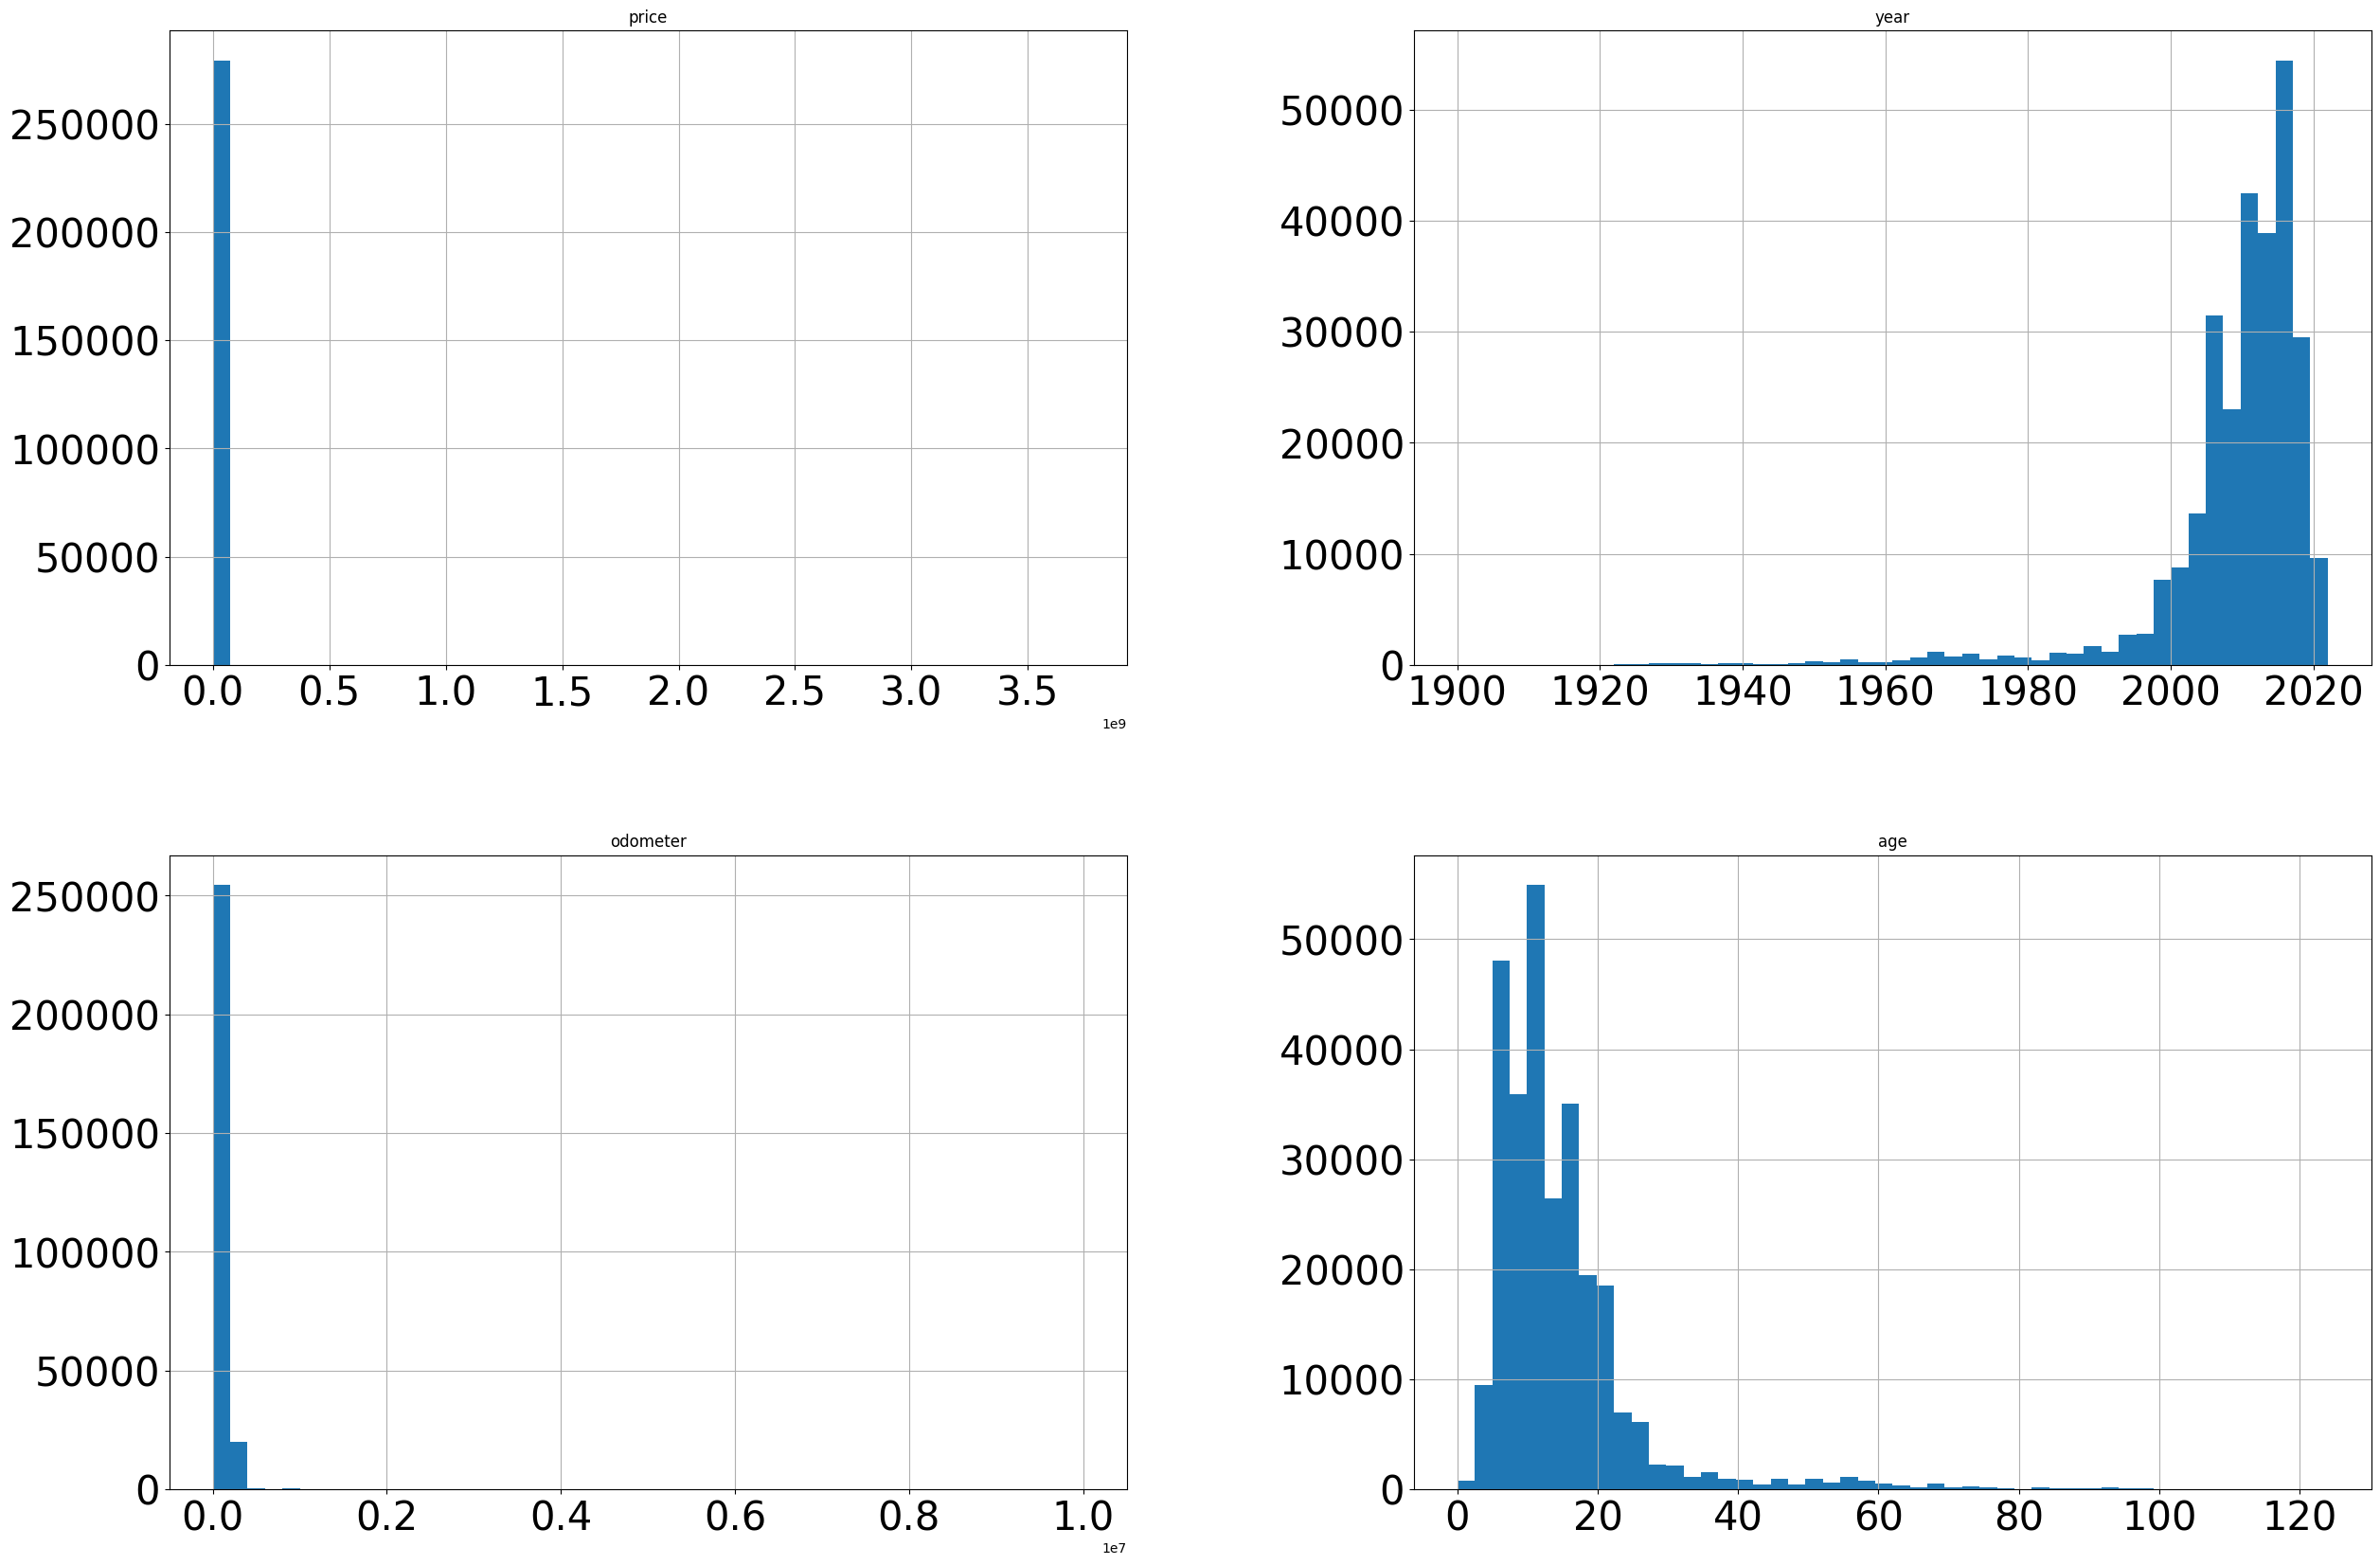

################# After Removing the Outliers from the dataset #################


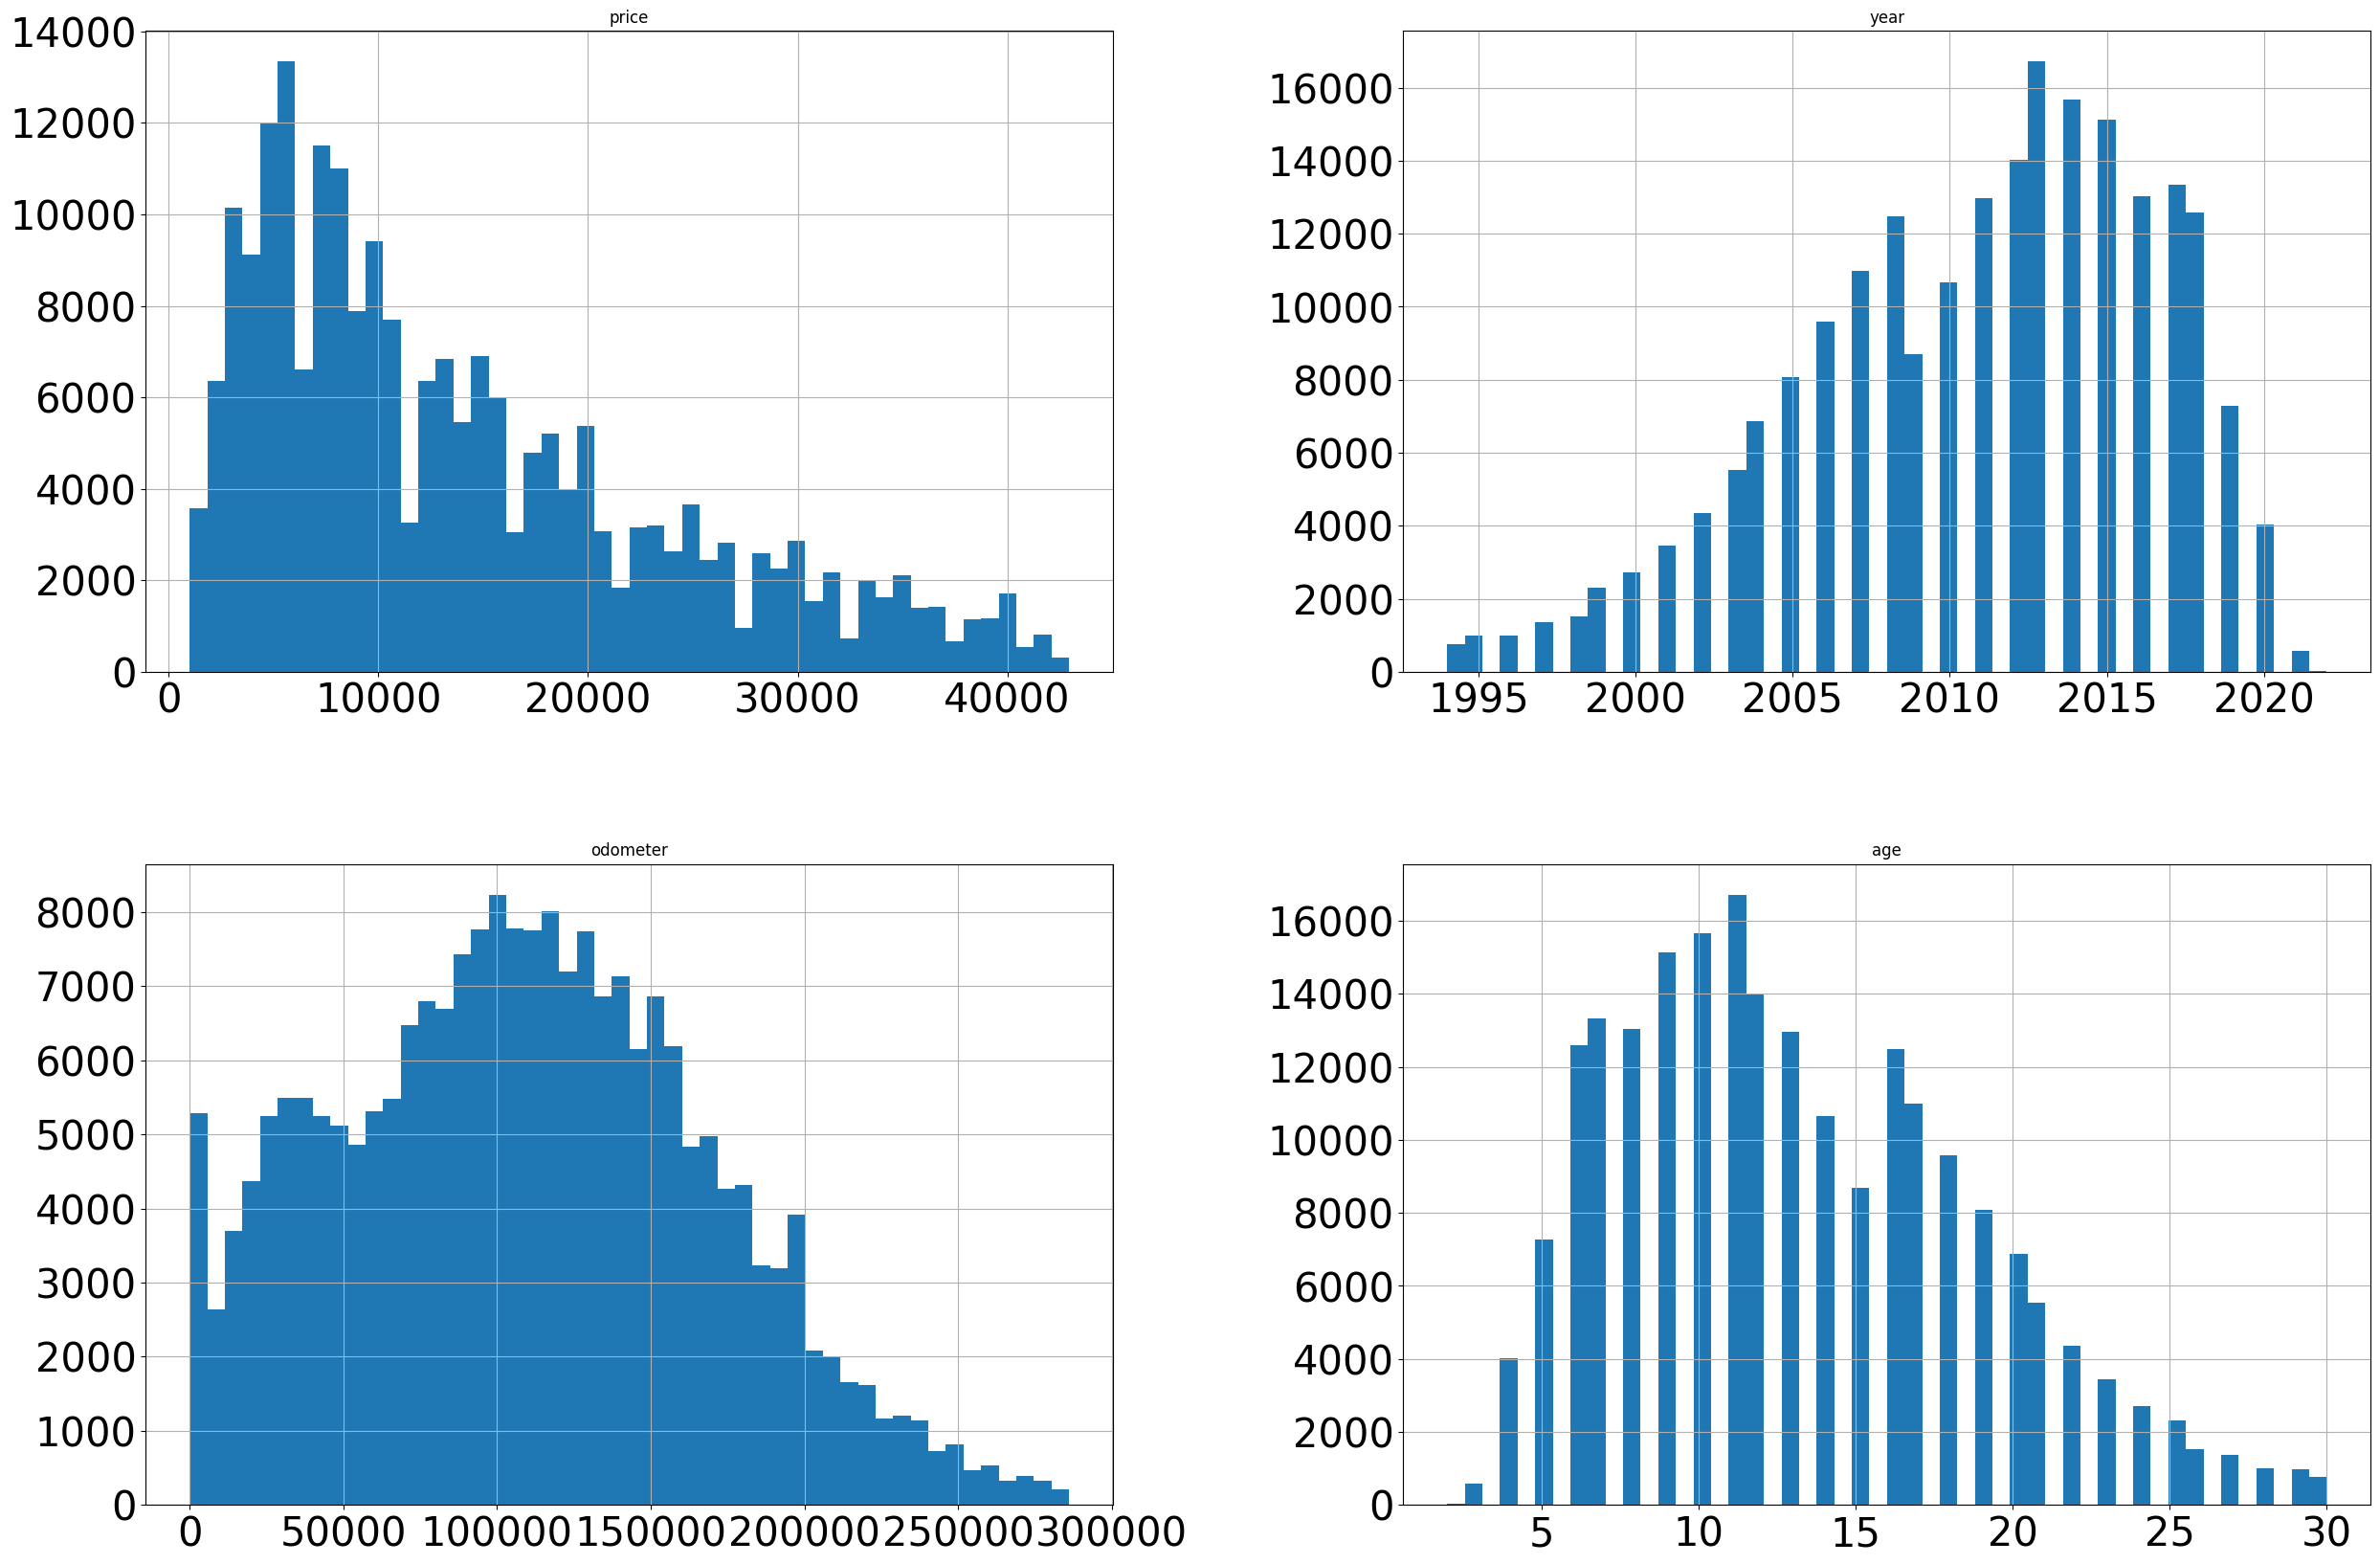

In [20]:
print("################# Before Removing Outliers from the dataset #################")
df_cleaned.hist(figsize=(30, 20), bins=50, xlabelsize=30, ylabelsize=30)
plt.show()
# Upper limit on price and odeometer from IQR
df_cleaned = df_cleaned[(df_cleaned['price'] < 42950) & (df_cleaned['price'] > 1000) & (df_cleaned['year'] > 1993) & (df_cleaned['odometer'] < 286110) &(df_cleaned['odometer'] > 0)]
print("################# After Removing the Outliers from the dataset #################")
df_cleaned.hist(figsize=(30, 20), bins=50, xlabelsize=30, ylabelsize=30)
plt.show()

In [21]:
# Removing the outliers made the distibution much more conventional vis-a-vis when the outliers were present 
df_cleaned.shape
# Outlier cleanup got rid of 70K more rows 

(216704, 18)

### 2.3 Generate Boxplots and Countplots post data cleanup 

    Observations:Sample data is high for 9-15 year old cars. Low volume of sample data for the relatively newer and older cars. Although car prices have gradually increased from 1994 , it has gradually tapered down in 2020-2022


################# Box and Count plot by age of the car #################


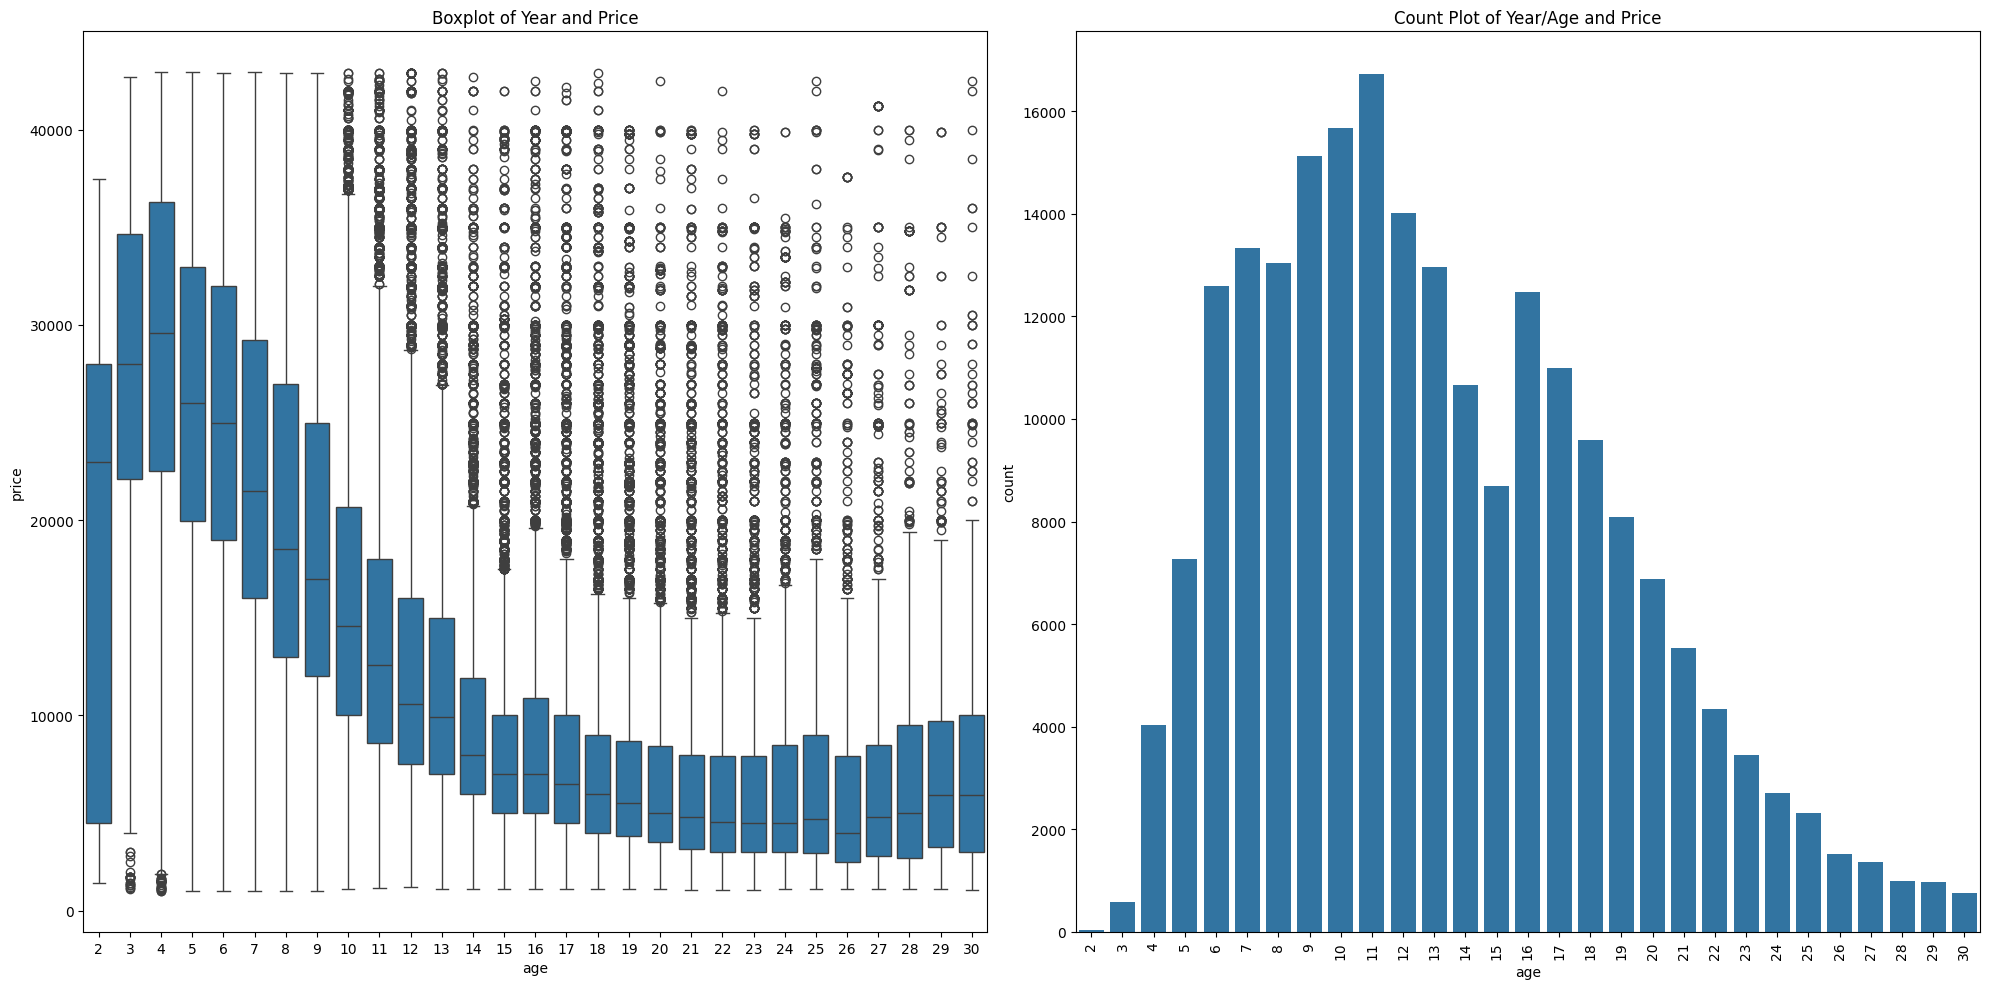

In [22]:
print("################# Box and Count plot by age of the car #################")
fig, ax = plt.subplots(1,2,figsize=(20, 10))
sns.boxplot(x="age", y='price', data=df_cleaned, ax=ax[0])
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Boxplot of Year/Age vs Price')
ax[0].set_title("Boxplot of Year and Price")
sns.countplot(x="age", data=df_cleaned, ax=ax[1])
plt.xticks(rotation=90)
plt.tight_layout()
ax[1].set_title("Count Plot of Year/Age and Price")
plt.show()

In [23]:
# Gradual Increase in prices till 2020 followed by a sharp fall
# Able to generate boxplot after removing the outliers , else was hanging due to some really high values and low values 0 and negative
# Sample data for 9.10 and 11 year olds cars are the highest and is lesser for the newer and older cars

### 2.4 Generate Box Plots for in-play Categorical variable/column
   
   As a part of the data analsysis we had identified select categorical columns which has low number of unique values and lower percentage of null values . The below is an attempt to draw the box and countplot for the same . We had identified that columns which are frequently populated and has a manageable list of values are more likely to help us arrive at some viable conclusions for price 

#### 2.4.1 Insights from the Box Plots
##### 2.4.1.1 Fuel Type:
Cars using 'Diesel' and 'other' types of fuel have the highest mean price.'Hybrid' cars, however, have the lowest mean price
    
##### 2.4.1.2 Title Status:
Cars with a 'lien' title status command the highest mean price.Conversely, cars with a 'missing' and 'Parts Only' title status have the lowest mean price.

##### 2.4.1.3 Transmission:
Cars with 'other' types of transmission have the highest mean price.'Manual' transmission cars have the lowest mean price.
    
#### 2.4.2 Insights from the Data Distribution/Count Plots

##### 2.4.2.1 Fuel Type:
The dataset is heavily skewed towards 'gas' fuel type samples, significantly outnumbering other fuel types.
##### 2.4.2.2 Title Status:
A substantial portion of the car sale data is associated with 'clean' titles, making other title statuses appear sparse in comparison.
##### 2.4.2.3 Transmission Type:
Similarly, the majority of the cars feature 'automatic' transmissions, with other transmission types being relatively rare.



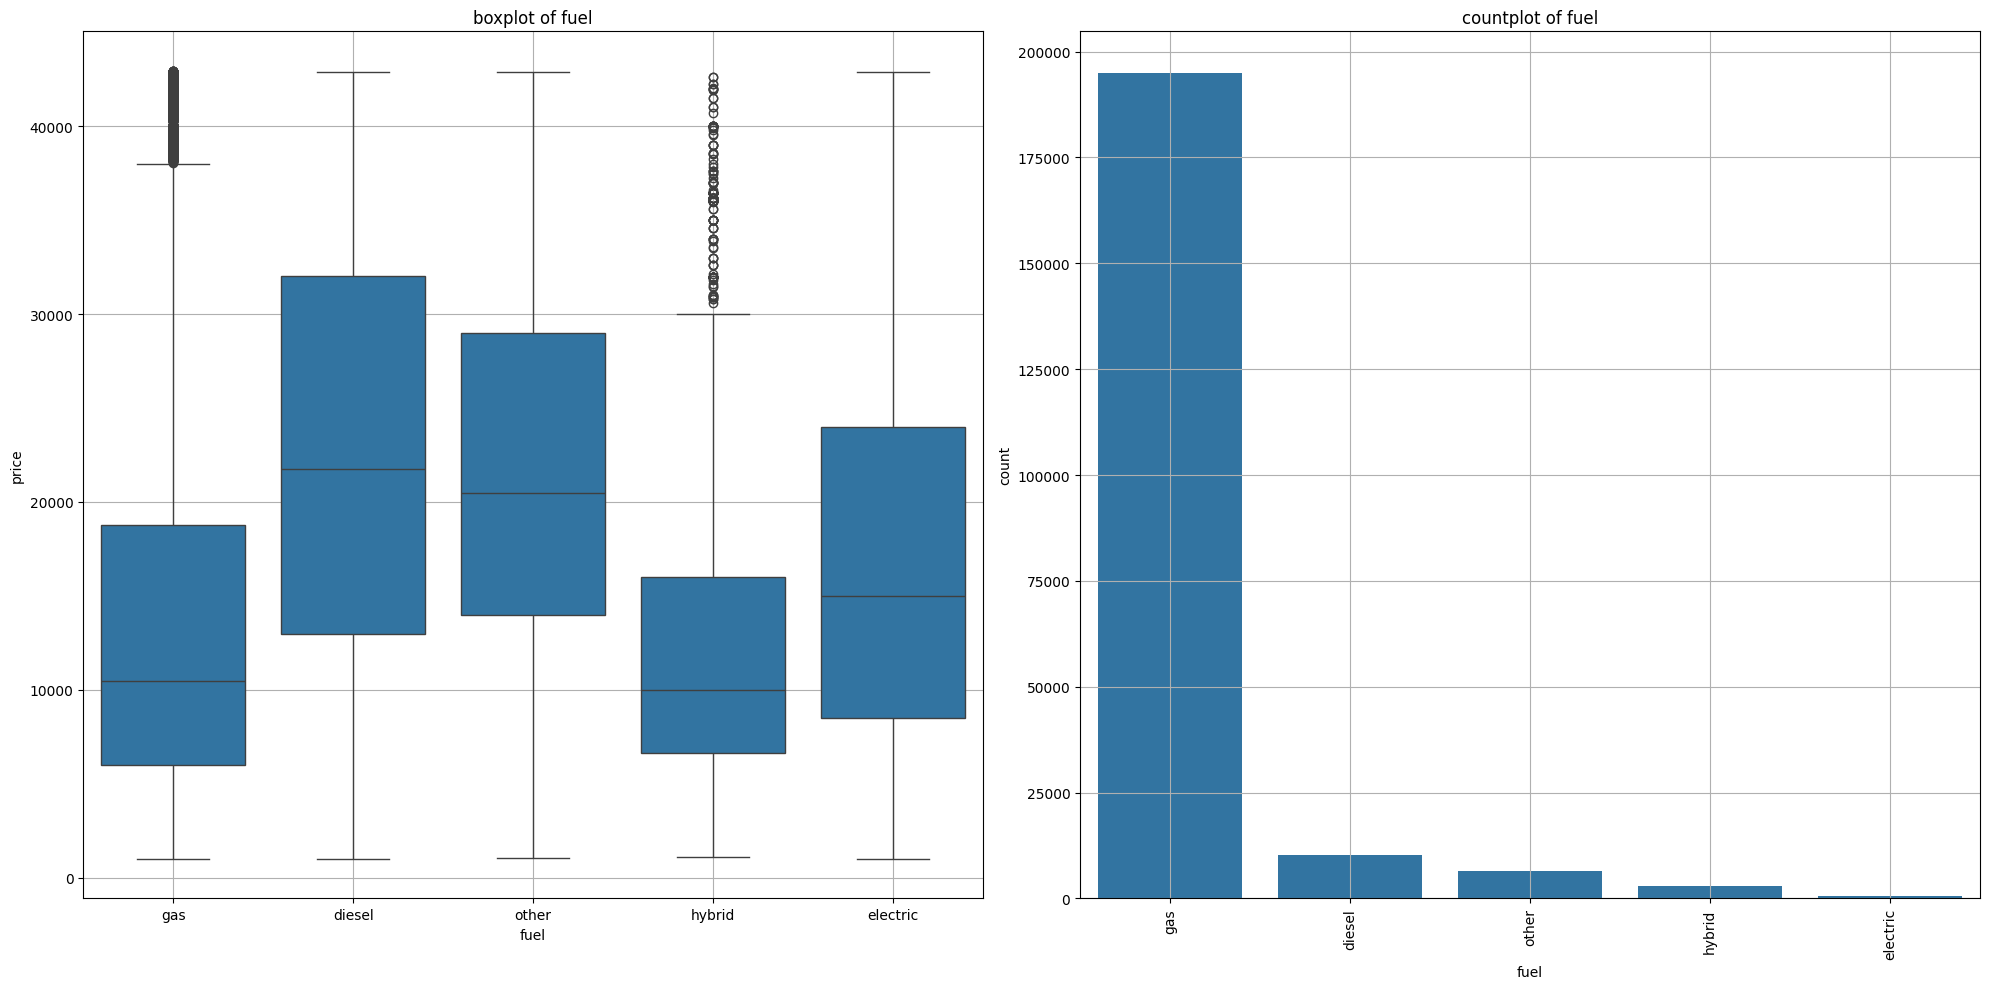

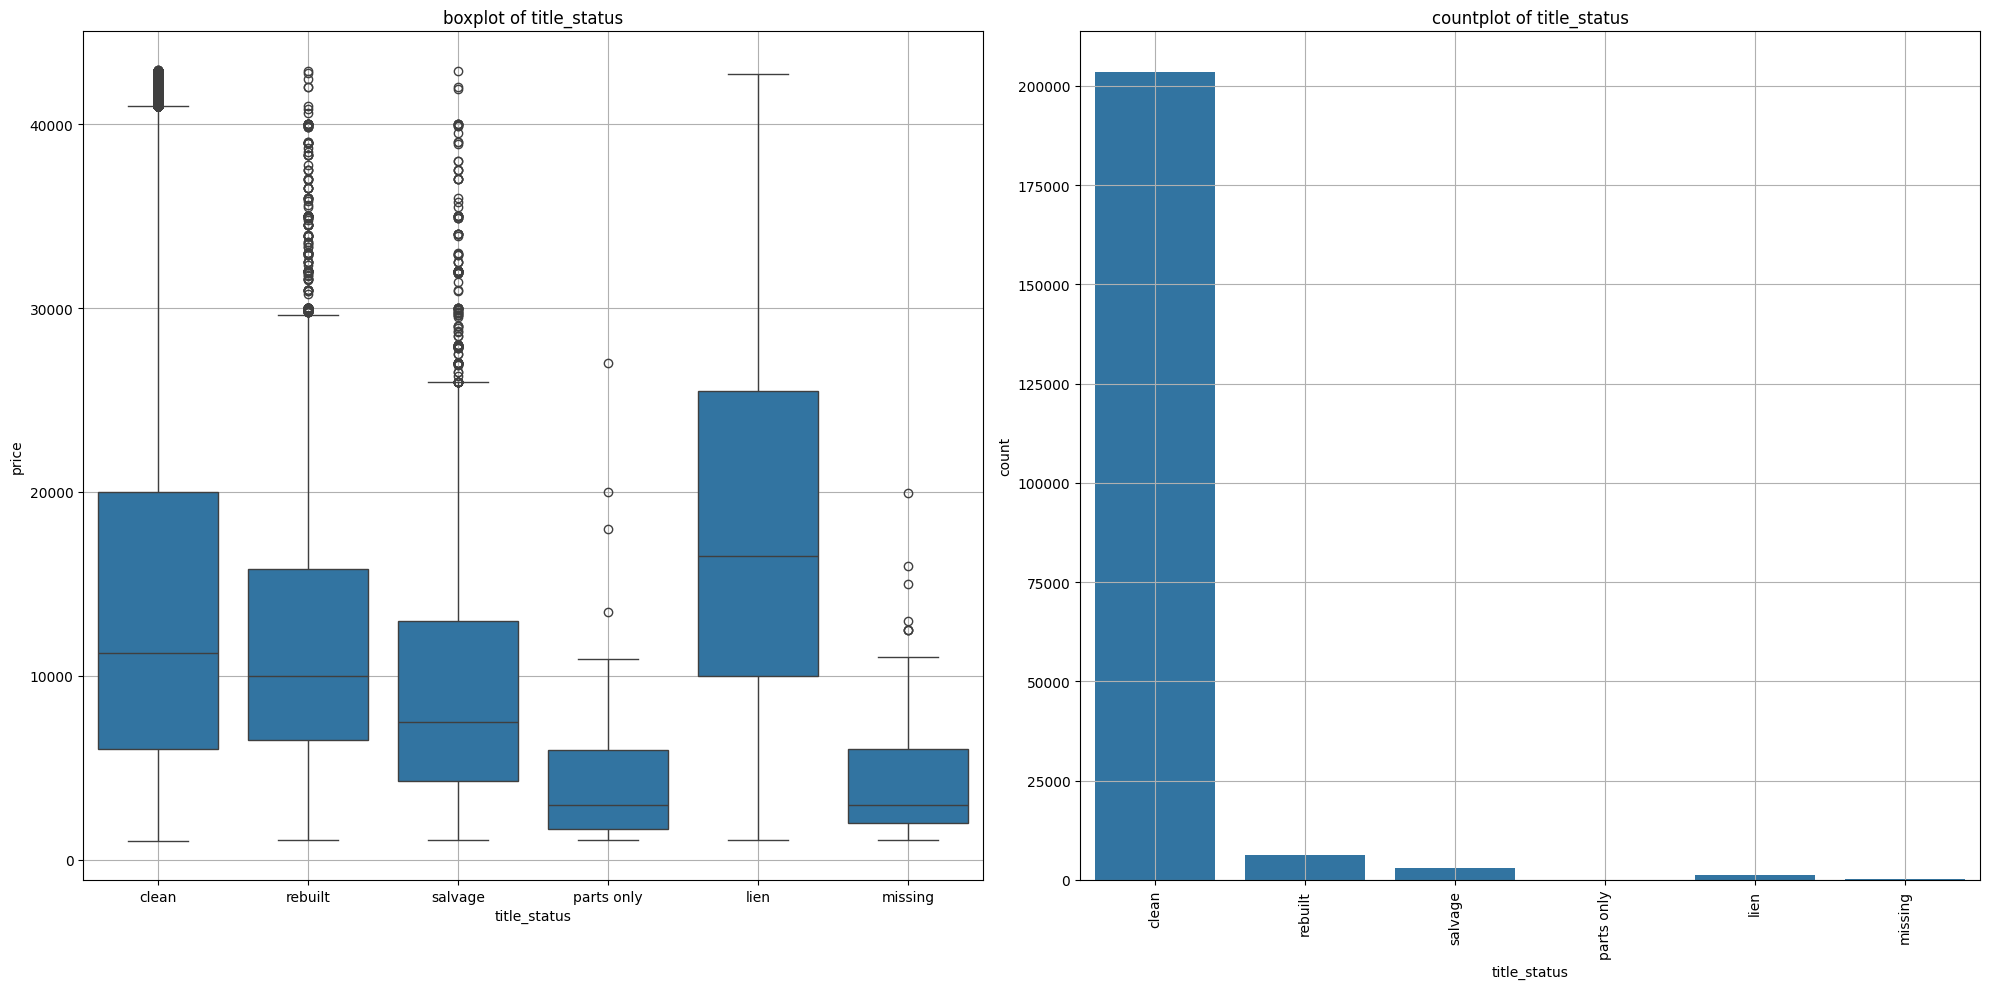

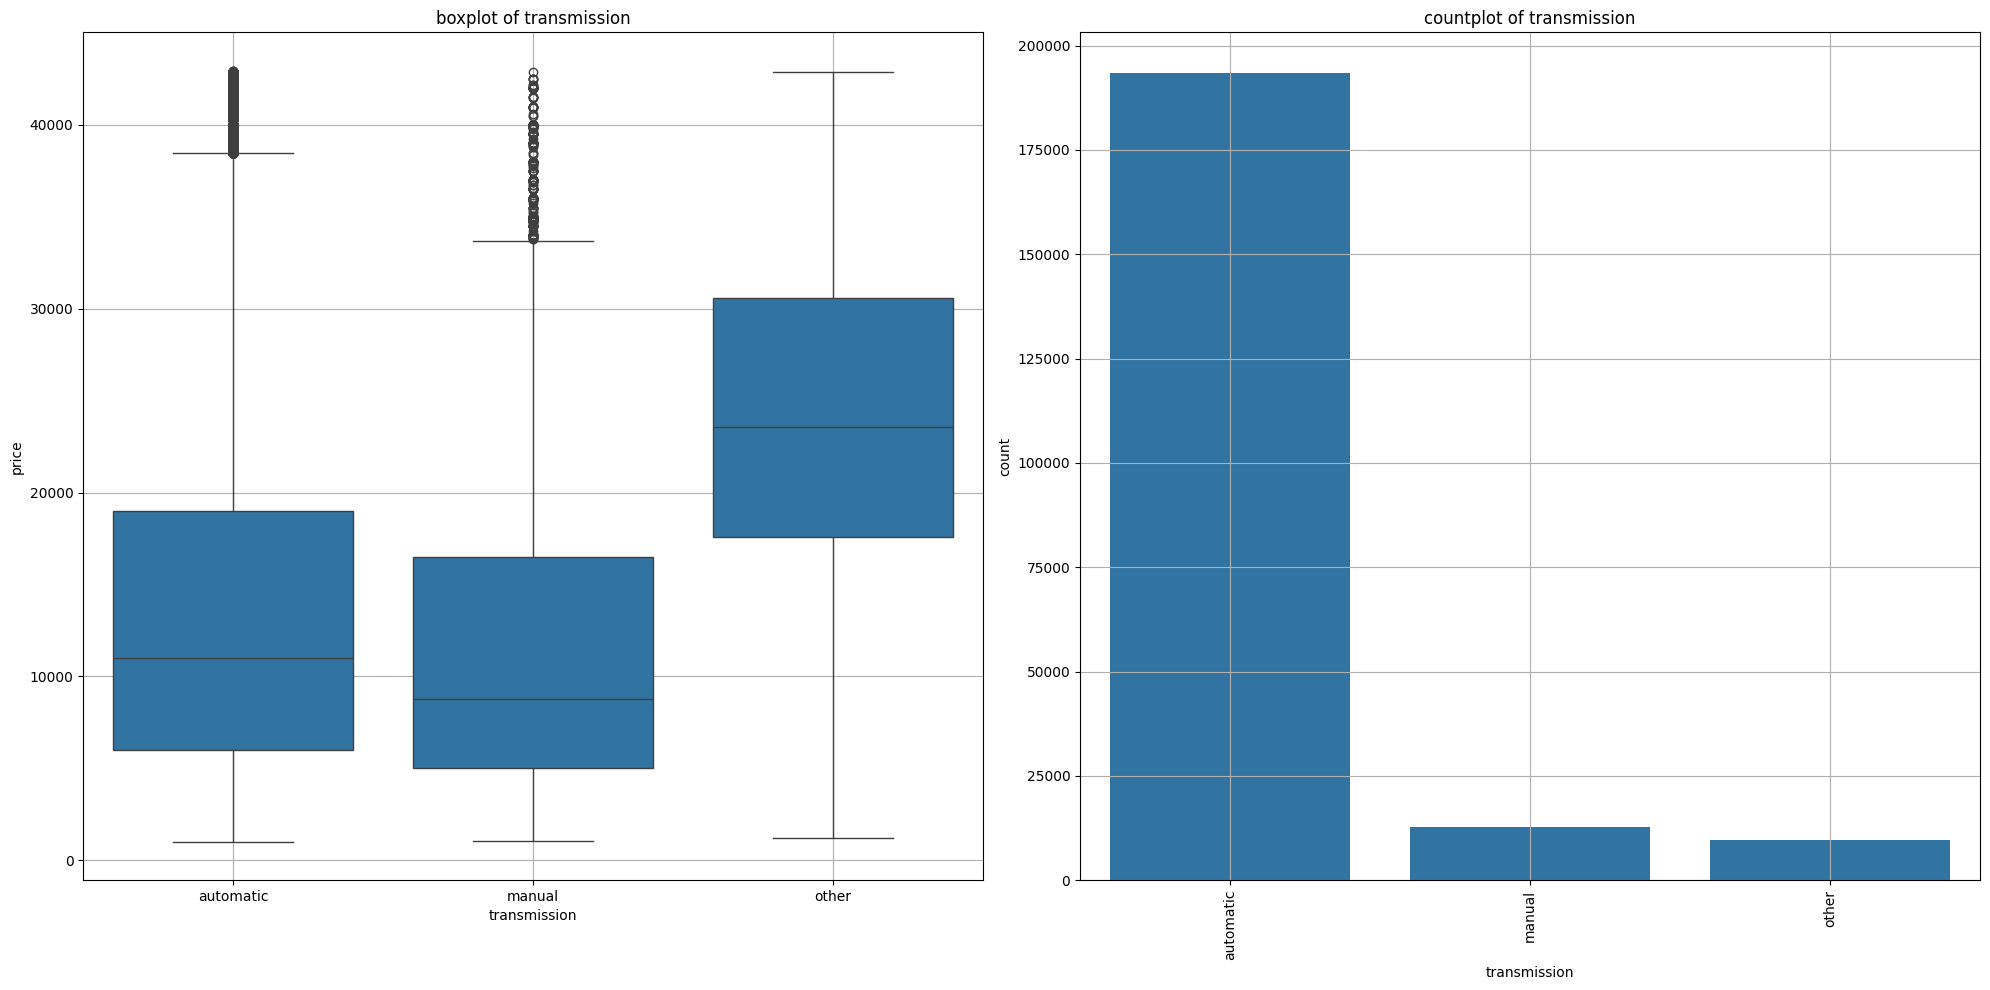

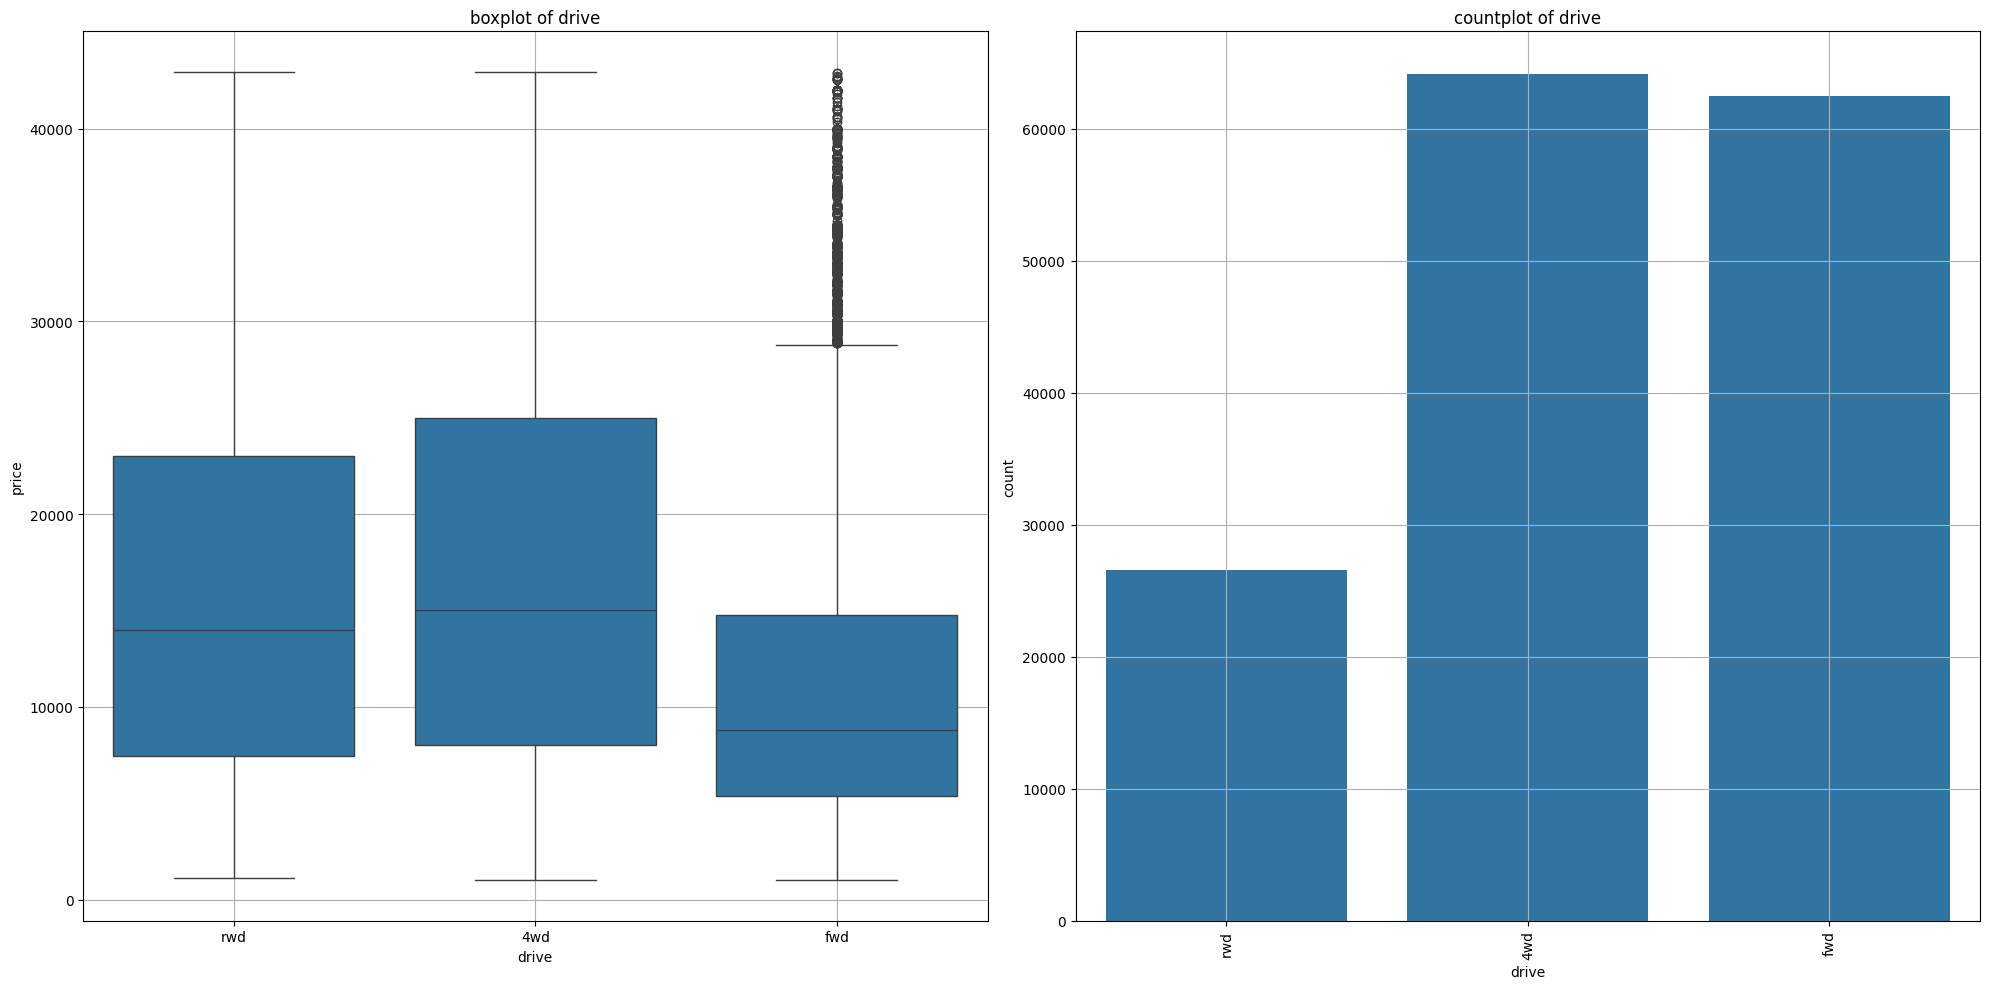

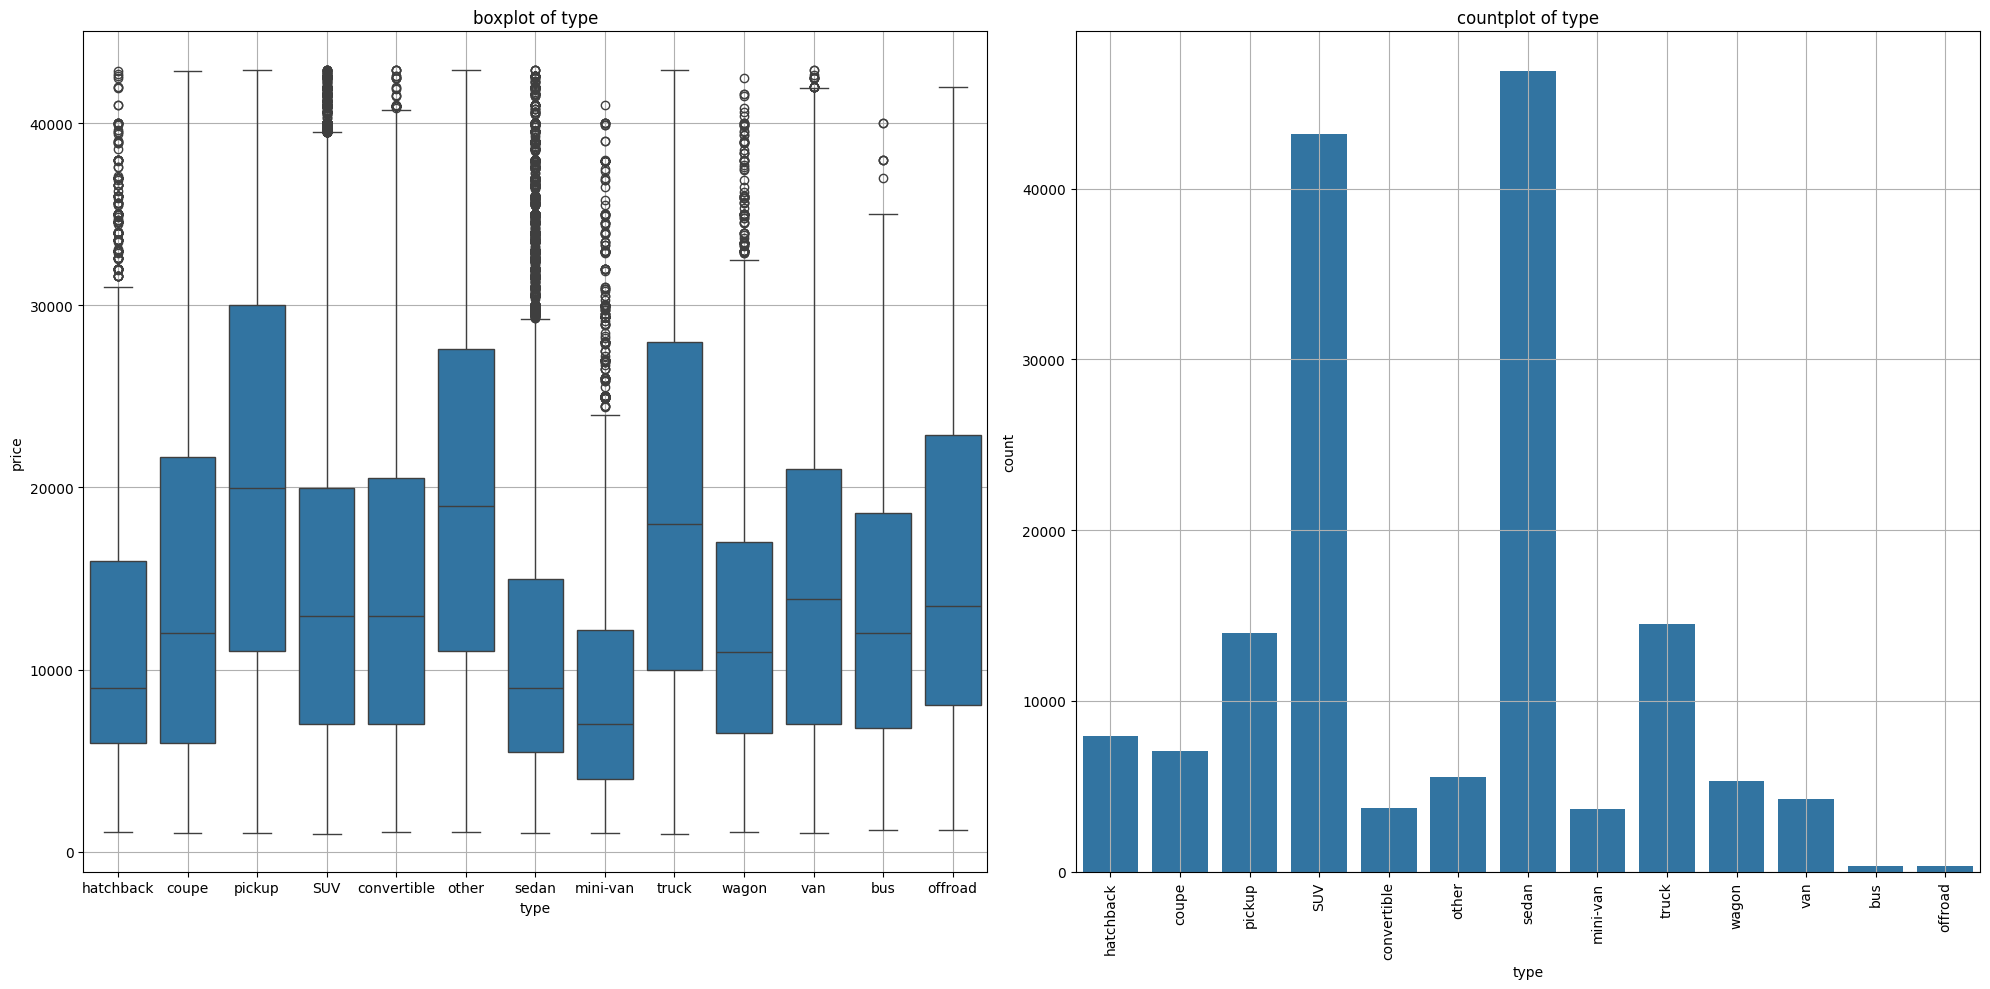

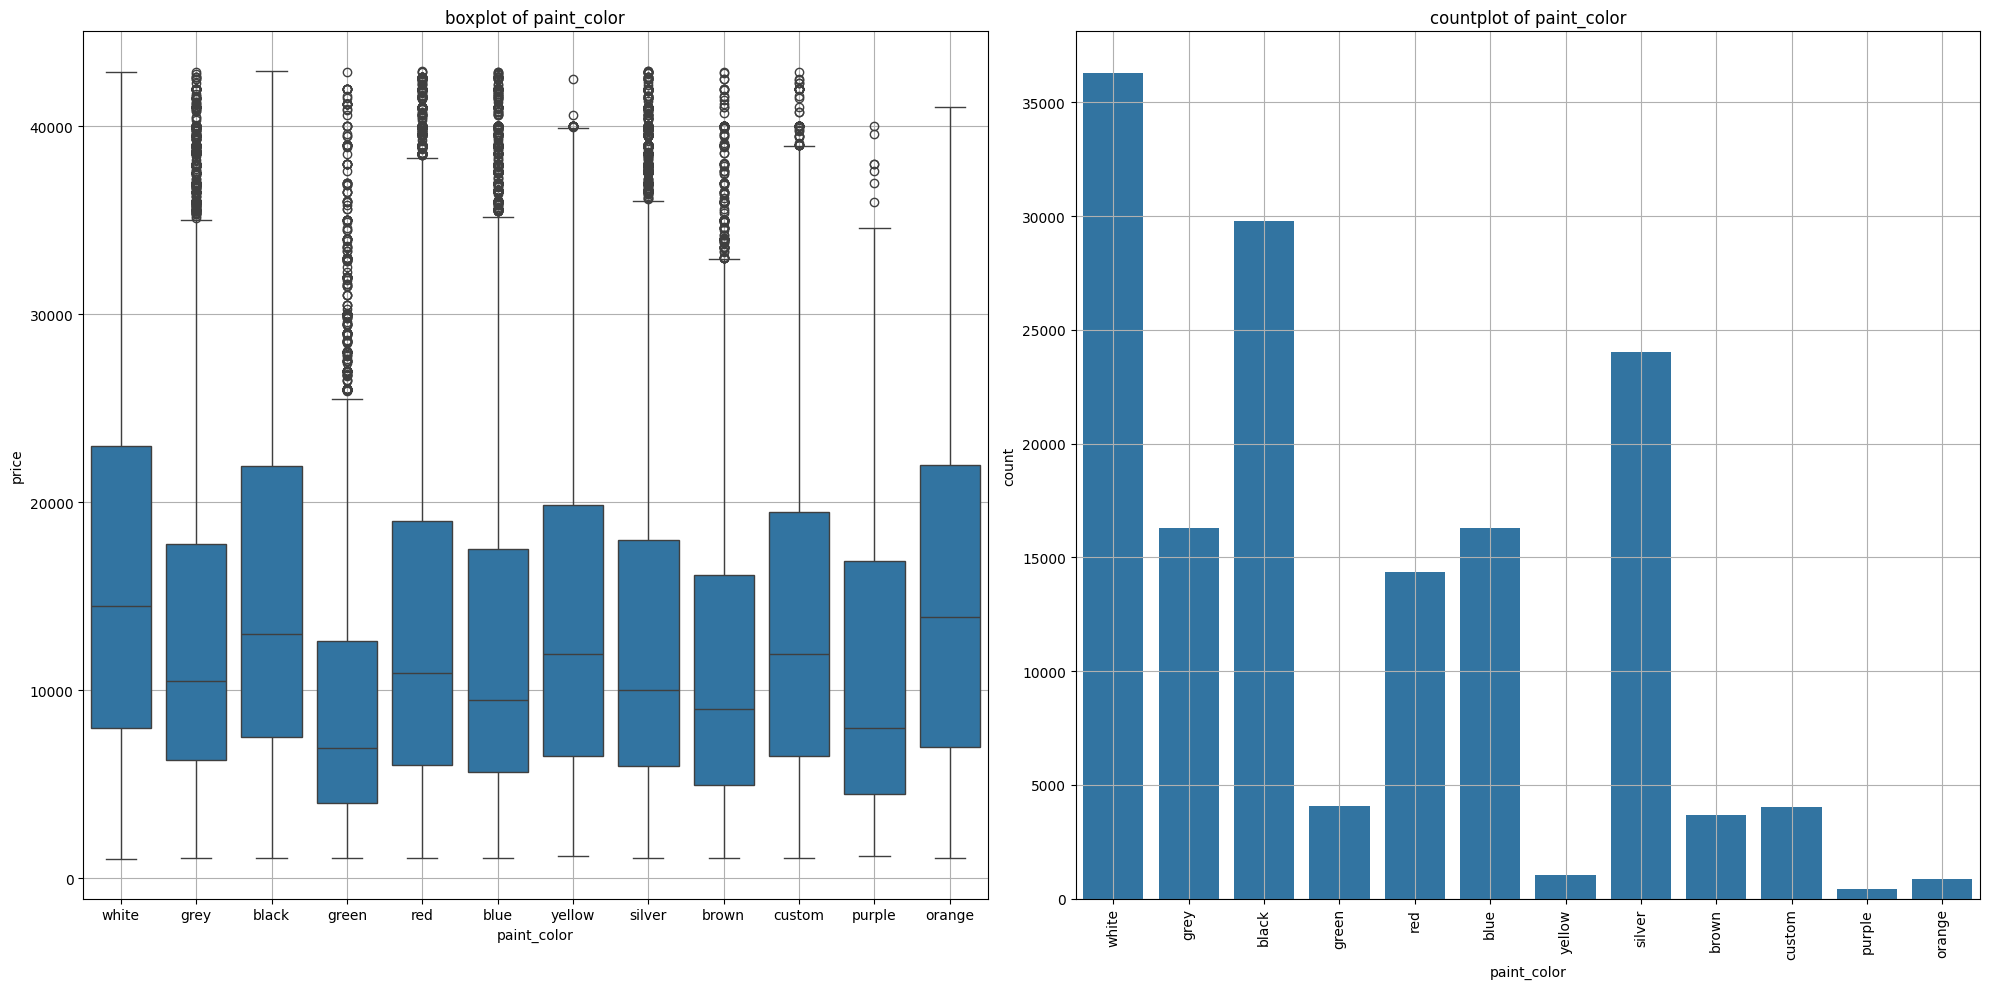

Out of LOOP


In [24]:
for i in cat_cols_to_consider:
    #print("In the Loop")
    fig, ax = plt.subplots(1, 2, figsize = (20, 10))
    sns.boxplot(x=i, y='price', data=df_cleaned, ax=ax[0])
    plt.xticks(rotation=90)
    plt.tight_layout()
    ax[0].grid()
    title = f'boxplot of {i}'
    ax[0].set_title(title)
    sns.countplot(x=i, data=df_cleaned, ax=ax[1])
    plt.xticks(rotation=90)
    plt.tight_layout()
    ax[1].grid()
    title = f'countplot of {i}'
    ax[1].set_title(title)
    plt.show() 
    plt.close()
print("Out of LOOP")

### 2.5 Correlation
1. Positive correleation between price and year
2. Negative correlation between Odometer reading and price
3. As is obvious with the first observation there is a negative correlation between the age of the car and price


In [25]:
df_check=df_cleaned[['price','year','age','odometer']].copy()
# Convert numerical columns to numeric data types and identify non-numeric values
#Check if there are inadvardent string values in Numeric placeholders
for col in df_check.select_dtypes(include=['number',"float64"]).columns:
    df_check[col + '_numeric'] = pd.to_numeric(df_cleaned[col], errors='coerce')
print(df_check.info())
# Identify rows with non-numeric values
non_numeric_rows = df_check[df_check.isna().any(axis=1)]
print(non_numeric_rows)
print(df_cleaned.shape)


<class 'pandas.core.frame.DataFrame'>
Index: 216704 entries, 23 to 279288
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   price             216704 non-null  int64  
 1   year              216704 non-null  float64
 2   age               216704 non-null  int64  
 3   odometer          216704 non-null  float64
 4   price_numeric     216704 non-null  int64  
 5   year_numeric      216704 non-null  float64
 6   age_numeric       216704 non-null  int64  
 7   odometer_numeric  216704 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 14.9 MB
None
Empty DataFrame
Columns: [price, year, age, odometer, price_numeric, year_numeric, age_numeric, odometer_numeric]
Index: []
(216704, 18)


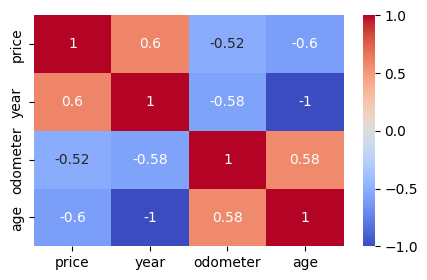

In [26]:
#df_cleaned=df_cleaned.drop('id',axis=1)
plt.figure(figsize=(5, 3))
#print(df_cleaned.isnull().sum())
df_numerical=df_cleaned.select_dtypes(include=['number',"float64"])
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm')
plt.show()

In [27]:
df_cleaned.head(100)
# Delete columns with over 40% null values or categorical LOV >15
df_cleaned=df_cleaned.drop(columns=cat_cols_to_delete)
df_cleaned.shape

(216704, 13)

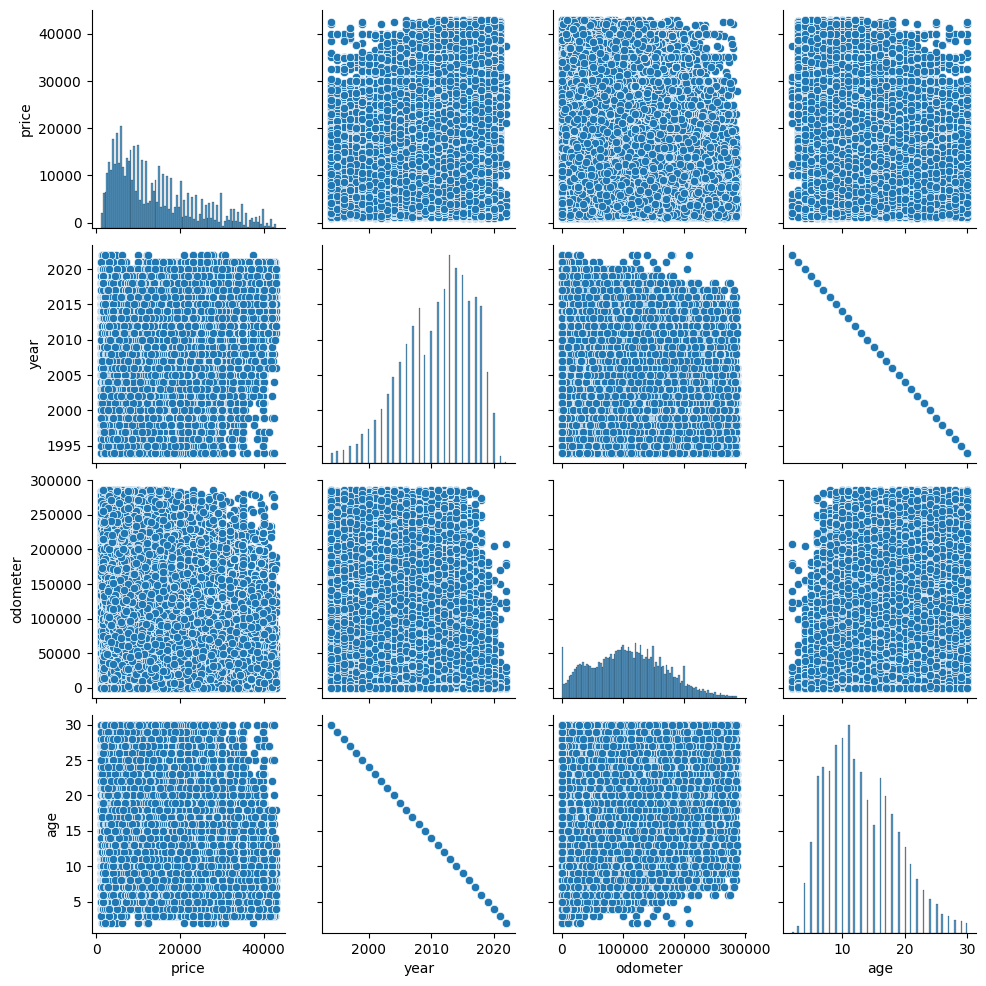

In [28]:
sns.pairplot(df_numerical)
plt.show()

No clear pattern emerges from the pairplot, as the data is not normalized . We will come back to the scatter plots when we run the model

### 3.0 Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### 3.1 Create training and test data 
  1. Create X and y as dataframes , with X containing the drivers/features to potentially drive the price and y the values for price
  2. Run train_test_split to split the training and test data . Test data constituting 20% and 80% training data 

In [29]:
df_cleaned["title_status"]=df_cleaned["title_status"].fillna("clean")
X = df_cleaned.drop(columns=['price','state'])
y = df_cleaned['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train.info()
print(X_train["title_status"].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 173363 entries, 168628 to 158789
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        173363 non-null  object 
 1   year          173363 non-null  float64
 2   manufacturer  168152 non-null  object 
 3   fuel          172448 non-null  object 
 4   odometer      173363 non-null  float64
 5   title_status  173363 non-null  object 
 6   transmission  172805 non-null  object 
 7   drive         122509 non-null  object 
 8   type          125434 non-null  object 
 9   paint_color   120826 non-null  object 
 10  age           173363 non-null  int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 15.9+ MB
title_status
clean         164785
rebuilt         4993
salvage         2449
lien             976
missing          112
parts only        48
Name: count, dtype: int64


### 3.2 Normalize and Standardize Data
As a pre-processing step Create a premise to 
1. Use StandardScaler to normalize or standardize numeric data
2. Use One Hot encoding for categorical columns which do not have inherent ranking
3. Use ordinal encoding for categorcical columns which do have an inherent ranking /order

In [31]:
num_features = ['age','year','odometer']
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
categorical_features = ['manufacturer', 'fuel', 'transmission', 'drive', 'type', 'paint_color']
categorical_transformer = Pipeline(steps=[
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore'))])
ordinal_features = ['title_status']
ordinal_transformer = Pipeline(steps=[
    ('ord_encoder', OrdinalEncoder(categories = [['clean', 'lien', 'parts only','salvage', 'rebuilt','missing']]))])

preprocess_normalize=make_column_transformer(
    (num_transformer, num_features),
    (categorical_transformer, categorical_features),
    (ordinal_transformer, ordinal_features))


### 3.3 Utility functions to avoid repeating code 
1. plot_prediction_vs_actual:  Subroutine to compare the predicted value with the actual value and calculate residual
2. simple_scatter_plot_pred_vs_actual: Subroutine to draw scatter plot between predicted values and actual
3. calculate_error: Routine focussed on calculating MSE, MAE and R2

In [32]:
# Pseudo global variables to hold the result and summarize the same . Using Lasso , Ridge and Linear Reg
model_result_summary_df = pd.DataFrame(columns=["model","train_mae","test_mae","train_mse","test_mse","train_r2","test_r2"])


In [33]:
def plot_prediction_vs_actual(y_train, y_train_pred, y_test, y_test_pred, name):
    fig, ax = plt.subplots(1, 2, figsize=(16, 5))
    ax[0].scatter(y_train_pred, y_train_pred - y_train.values, c='blue', marker='o', label='Training data')
    ax[0].scatter(y_test_pred, y_test_pred - y_test.values, c='lightgreen', marker='s', label='Test data')
    ax[0].set_xlabel('Predicted values')
    ax[0].set_ylabel('Residuals')
    ax[0].legend(loc='upper left')
    ax[0].set_title(name + ' - Residuals')
    # plot predicted values
    ax[1].scatter(y_train_pred, y_train.values, c='blue', marker='o', label='Training data')
    ax[1].scatter(y_test_pred, y_test.values, c='lightgreen', marker='s', label='Test data')
    ax[1].set_xlabel('Predicted values')
    ax[1].set_ylabel('Real values')
    ax[1].legend(loc='upper left')
    ax[1].set_title(name + ': Training vs Test data')
    plt.tight_layout()
    plt.show()

In [34]:
def simple_scatter_plot_pred_vs_actual(train_preds,y_train,test_preds,y_test,name):
    sns.scatterplot(x=train_preds,y=y_train)
    plt.xlabel("Training Prediction")
    plt.ylabel("Training Actuals")
    plt.title(f"Training: Prediction vs Actuals using {name}")
    plt.show()
    plt.close()
    sns.scatterplot(x=test_preds,y=y_test)
    plt.xlabel("Test Prediction")
    plt.ylabel("Test Actuals")
    plt.title(f"Training: Prediction vs Actuals using {name}")
    plt.show()
    plt.close()    

In [35]:
def calculate_error(X_train, X_test, y_train, y_test, model, name):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_mse = mean_squared_error(y_train, train_preds)
    test_mse =  mean_squared_error(y_test, test_preds)
    print(name, f'Train MSE: {train_mse}')
    print(name, f'Test MSE: {test_mse}')
    # calculate mae
    train_mae = mean_absolute_error(y_train, train_preds)
    test_mae = mean_absolute_error(y_test, test_preds)
    print(name, f'Train MAE: {train_mae}')
    print(name, f'Test MAE: {test_mae}')
    train_r2 = r2_score(y_train, train_preds)
    test_r2 = r2_score(y_test, test_preds)
    print(name, f'Train R2: {train_r2}')
    print(name, f'Test R2: {test_r2}')
    model_summary_row={"model":name,"train_mae":train_mae,"test_mae":test_mae,"train_mse":train_mse,"test_mse":test_mse,"train_r2":train_r2,"test_r2":test_r2}
    model_result_summary_df.loc[len(model_result_summary_df)]=model_summary_row
    simple_scatter_plot_pred_vs_actual(train_preds,y_train, test_preds, y_test, name)

In [36]:
def plot_result_summary_comparison(result_summary_df, columns,title):
    result_summary_df.plot.bar(x='model', y=columns, rot=0)
    plt.ylabel('Error Score')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(title)
    plt.show()

### 3.4 Linear Regression 
Generate the model leveraging the extremely popular Linear Regression algortihm 
The error between predicted and actual value across training and test set. 
##### Calculating both MSE and MAE
    LinearRegression Train MSE: 33274407.33452236
    LinearRegression Test MSE: 33392936.898809757
    LinearRegression Train MAE: 4301.877495987866
    LinearRegression Test MAE: 4333.389984628218
    LinearRegression Train R2: 0.6592602434138217
    LinearRegression Test R2: 0.6609408820327738

LinearRegression Train MSE: 33274407.33452236
LinearRegression Test MSE: 33392936.898809757
LinearRegression Train MAE: 4301.877495987866
LinearRegression Test MAE: 4333.389984628218
LinearRegression Train R2: 0.6592602434138217
LinearRegression Test R2: 0.6609408820327738


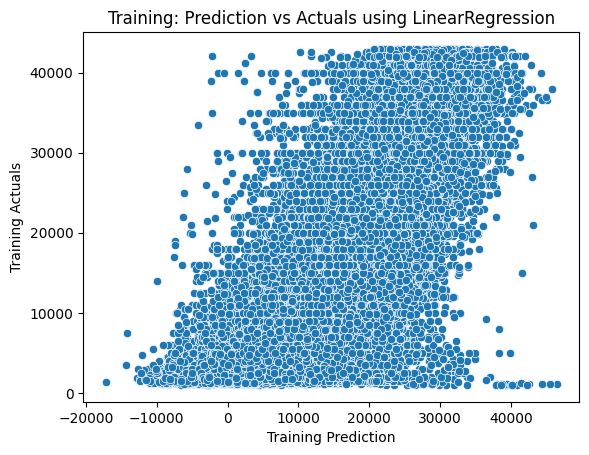

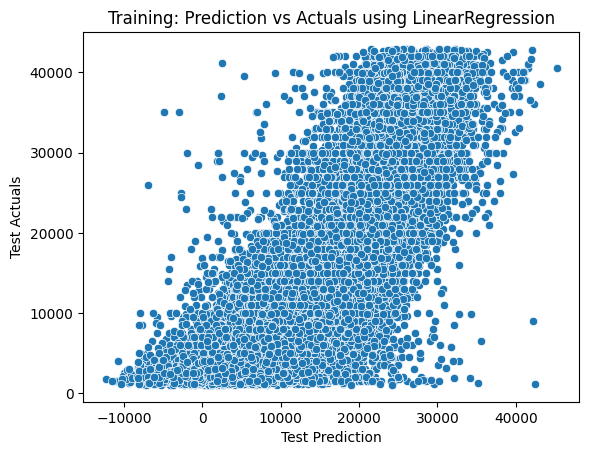

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'year', 'odometer']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['manufacturer', 'fuel',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('ord_encoder',
                                                                   OrdinalEncoder(categories=[['clean',
                                                                                               'lien',
                                                                                               'parts '
                                                                                               'only',
                                                                                               'salvage',
                                                                                               'rebuilt',
                                                                                               'missing']]))]),
                                                  ['title_status'])])),
                ('regressor', LinearRegression())])

In [37]:
lr_pipe = Pipeline(steps=[
    ('preprocessor', preprocess_normalize),
    ('regressor', LinearRegression())])

lr_pipe.fit(X_train, y_train)
calculate_error(X_train, X_test, y_train, y_test, lr_pipe, 'LinearRegression')
lr_pipe

### 3.5 Lasso Regression
Generate the model leveraging the Lasso Regression algortihm 
The error between predicted and actual value across training and test set. 
##### Calculating both MSE and MAE
   ##### Lasso Train MSE: 33295343.72445596
   ##### Lasso Test MSE: 33419901.206565484
   ##### Lasso Train MAE: 4302.439459484893
   ##### Lasso Test MAE: 4333.457149926385
   ##### Lasso Train R2: 0.6590458485986701
   ##### Lasso Test R2: 0.6606670967580026


Lasso Train MSE: 33295343.72445596
Lasso Test MSE: 33419901.206565484
Lasso Train MAE: 4302.439459484893
Lasso Test MAE: 4333.457149926385
Lasso Train R2: 0.6590458485986701
Lasso Test R2: 0.6606670967580026


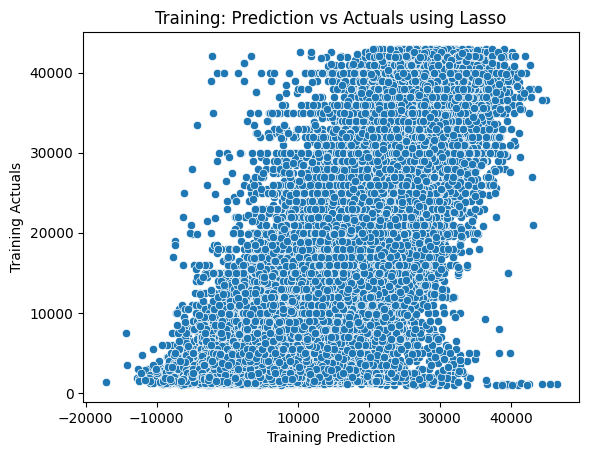

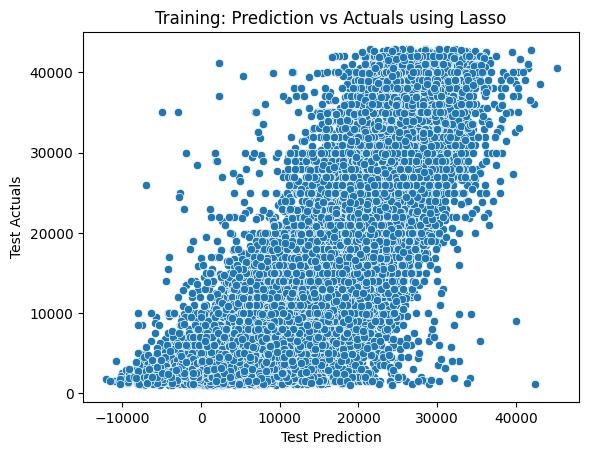

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'year', 'odometer']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['manufacturer', 'fuel',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('ord_encoder',
                                                                   OrdinalEncoder(categories=[['clean',
                                                                                               'lien',
                                                                                               'parts '
                                                                                               'only',
                                                                                               'salvage',
                                                                                               'rebuilt',
                                                                                               'missing']]))]),
                                                  ['title_status'])])),
                ('regressor', Lasso())])

In [38]:
lasso_pipe = Pipeline(steps=[
    ('preprocessor', preprocess_normalize),
    ('regressor', Lasso())])

lasso_pipe.fit(X_train, y_train)
calculate_error(X_train, X_test, y_train, y_test, lasso_pipe, 'Lasso')
lasso_pipe

### 3.6 Ridge Regression
Generate the model leveraging the Ridge Regression algortihm 
The error between predicted and actual value across training and test set. 
##### Calculating both MSE and MAE

    ##### Ridge Train MSE: 33280593.238501616
    ##### Ridge Test MSE: 33401234.440967843
    ##### Ridge Train MAE: 4302.153940971168
    ##### Ridge Test MAE: 4333.5697332564305
    ##### Ridge Train R2: 0.6591968979304608
    ##### Ridge Test R2: 0.6608566319611511

Ridge Train MSE: 33280593.238501616
Ridge Test MSE: 33401234.440967843
Ridge Train MAE: 4302.153940971168
Ridge Test MAE: 4333.5697332564305
Ridge Train R2: 0.6591968979304608
Ridge Test R2: 0.6608566319611511


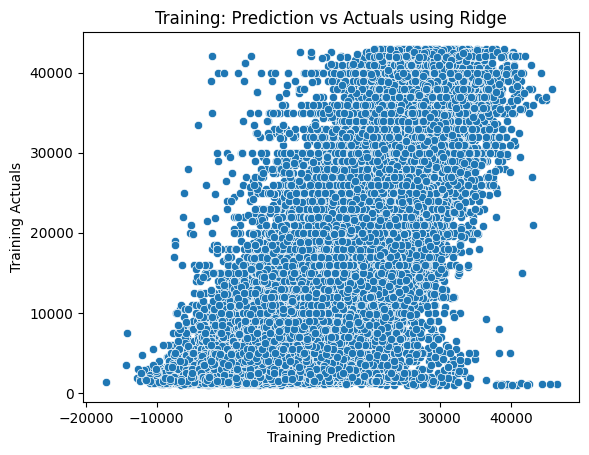

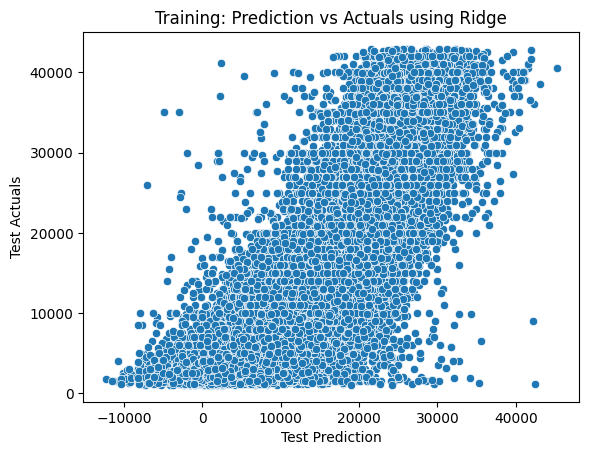

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'year', 'odometer']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['manufacturer', 'fuel',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('ord_encoder',
                                                                   OrdinalEncoder(categories=[['clean',
                                                                                               'lien',
                                                                                               'parts '
                                                                                               'only',
                                                                                               'salvage',
                                                                                               'rebuilt',
                                                                                               'missing']]))]),
                                                  ['title_status'])])),
                ('regressor', Ridge())])

In [39]:
ridge_pipe = Pipeline(steps=[
    ('preprocessor', preprocess_normalize),
    ('regressor', Ridge())])

ridge_pipe.fit(X_train, y_train)
calculate_error(X_train, X_test, y_train, y_test, ridge_pipe, 'Ridge')
ridge_pipe

### 3.7 Model Analysis
   As can be inferred below all three regressions give similar results on all 3 algorithms ( Linear, Ridge and Lasso). Linear regression does not have options of hyper parameters to tune , so planning to tune hyper parameters for Ridge and Lasso subsequently and re-run the model

              model    train_mae     test_mae     train_mse      test_mse  \
0  LinearRegression  4301.877496  4333.389985  3.327441e+07  3.339294e+07   
1             Lasso  4302.439459  4333.457150  3.329534e+07  3.341990e+07   
2             Ridge  4302.153941  4333.569733  3.328059e+07  3.340123e+07   

   train_r2   test_r2  
0  0.659260  0.660941  
1  0.659046  0.660667  
2  0.659197  0.660857  


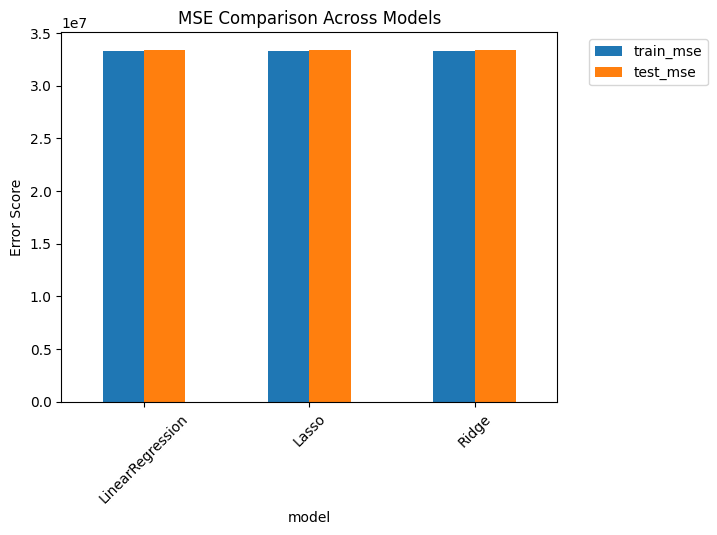

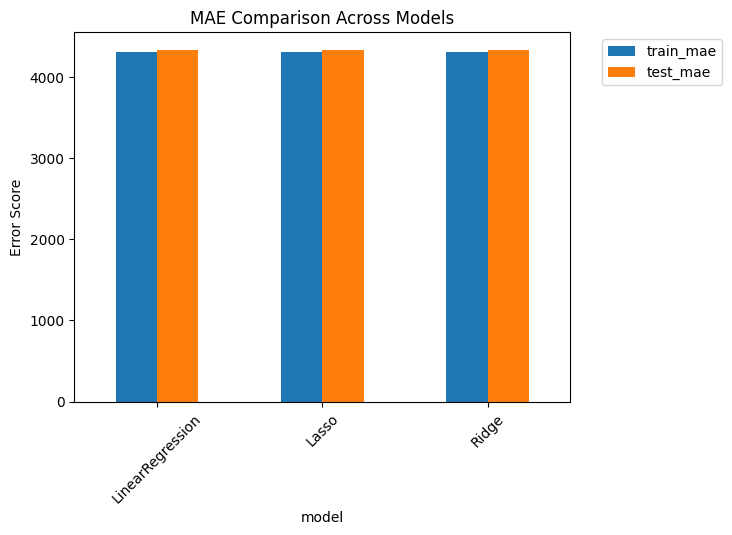

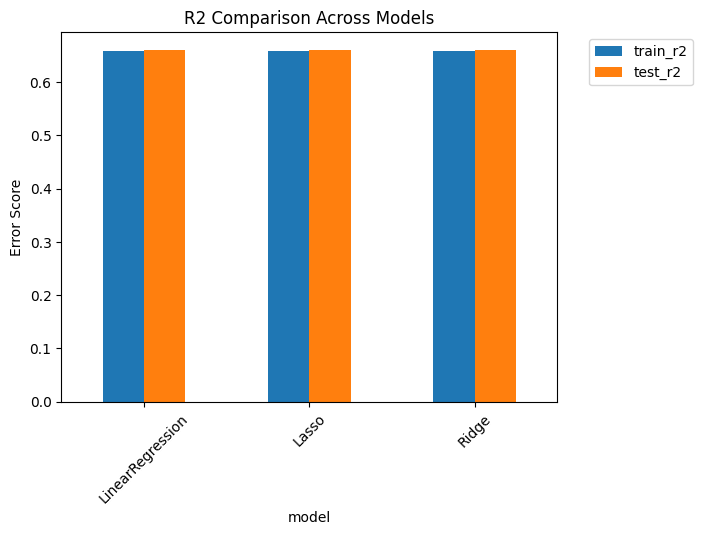

In [40]:
print(model_result_summary_df)
#model_result_summary_df=model_result_summary_df.drop(model_result_summary_df.index)
#print(model_result_summary_df)
plot_result_summary_comparison(model_result_summary_df, columns=["train_mse","test_mse"],title="MSE Comparison Across Models")
plot_result_summary_comparison(model_result_summary_df, columns=["train_mae","test_mae"],title="MAE Comparison Across Models")
plot_result_summary_comparison(model_result_summary_df, columns=["train_r2","test_r2"],title="R2 Comparison Across Models")

##### Hyperparameter Tuning

###### Define parameter grids and perform GridSearchCV
    
    param_grid_ridge = {'regressor__alpha': [0.0001,0.001,0.01, 0.1,1]}    
    param_grid_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}

###### Inference

    Best Ridge: MSE=33400856.916762024, MAE=4333.510054230671, R2=0.6608604651976413
    Best Lasso: MSE=33395866.82926768, MAE=4333.314932053314, R2=0.6609111326387693


In [41]:
param_grid_ridge = {'regressor__alpha': [0.0001,0.001,0.01, 0.1,1]}
param_grid_lasso = {'regressor__alpha': [0.0001,0.001,0.01, 0.1,1]}
#print(X_train.dtypes) 
#print(y_train.dtypes)
# GridSearchCV for Ridge
grid_search_ridge = GridSearchCV(ridge_pipe, param_grid_ridge, cv=5, scoring='neg_mean_squared_error',error_score="raise",verbose=3)
grid_search_ridge.fit(X_train, y_train)

# GridSearchCV for Lasso
grid_search_lasso = GridSearchCV(lasso_pipe, param_grid_lasso, cv=3, scoring='neg_mean_squared_error',error_score="raise",verbose=3)
grid_search_lasso.fit(X_train, y_train)

# Get the best models
best_ridge = grid_search_ridge.best_estimator_
print(best_ridge)
best_lasso = grid_search_lasso.best_estimator_
print(best_lasso)


# Predict with the best models
y_pred_best_ridge = best_ridge.predict(X_test)
y_pred_best_lasso = best_lasso.predict(X_test)

# Evaluate the models
# Ridge
mse_ridge = mean_squared_error(y_test, y_pred_best_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_best_ridge)
r2_ridge = r2_score(y_test, y_pred_best_ridge)

# Lasso
mse_lasso = mean_squared_error(y_test, y_pred_best_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_best_lasso)
r2_lasso = r2_score(y_test, y_pred_best_lasso)

print(f"Best Ridge: MSE={mse_ridge}, MAE={mae_ridge}, R2={r2_ridge}")
print(f"Best Lasso: MSE={mse_lasso}, MAE={mae_lasso}, R2={r2_lasso}")




Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ...regressor__alpha=0.0001;, score=-33256059.244 total time=   1.4s
[CV 2/5] END ...regressor__alpha=0.0001;, score=-33373786.664 total time=   1.4s
[CV 3/5] END ...regressor__alpha=0.0001;, score=-33339477.275 total time=   1.4s
[CV 4/5] END ...regressor__alpha=0.0001;, score=-33501328.530 total time=   1.0s
[CV 5/5] END ...regressor__alpha=0.0001;, score=-33163636.984 total time=   1.1s
[CV 1/5] END ....regressor__alpha=0.001;, score=-33256918.287 total time=   1.4s
[CV 2/5] END ....regressor__alpha=0.001;, score=-33374777.048 total time=   1.5s
[CV 3/5] END ....regressor__alpha=0.001;, score=-33339771.872 total time=   1.5s
[CV 4/5] END ....regressor__alpha=0.001;, score=-33494714.690 total time=   1.4s
[CV 5/5] END ....regressor__alpha=0.001;, score=-33163548.239 total time=   1.1s
[CV 1/5] END .....regressor__alpha=0.01;, score=-33256766.410 total time=   1.5s
[CV 2/5] END .....regressor__alpha=0.01;, score=-

### 4.0 Evaluation

    With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### 4.1 Conslusion
    Linear Regression, Lasso(), Ridge() , Lasso with Hyperparameter tuning and Ridge with hyperparameter tuning showed similar results in terms of accurancy R2 of 65-67 %. It is recommended that we leverage Linear Regression for the simplicity and keep running the models with new samples of refined data to evaluate if other options fare better than Linnear Regression. The features Manufacturer,fuel, type,drive, odeometer and age 

In [42]:
def determine_coefficients(l_pipeline,top_x):
    l_regressor=l_pipeline.named_steps["regressor"]
    coefficients=l_regressor.coef_
    feature_names=l_pipeline.named_steps['preprocessor'].get_feature_names_out()
    l_feature_coeff_df=pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    l_feature_coeff_df["Absolute Coefficient"]=l_feature_coeff_df["Coefficient"].abs()
    print(top_x)
    l_feature_coeff_df=l_feature_coeff_df.sort_values(by="Absolute Coefficient",ascending=False).head(top_x)
    return  l_feature_coeff_df   

In [43]:
def plot_coefficient(df,top_x,exclude_manufacturing):
    plt.figure(figsize=(10, 10))
    # Manufacturing is one of the top contributor and is dwarfing the graph, 
    # so added this condition to check the rest of the drivers
    if (exclude_manufacturing):
       df=df[~df["Feature"].str.contains("manufacturer")]
    plt.barh(df['Feature'], df['Coefficient'])
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    if (~exclude_manufacturing):
        plt.title(f'Top {top_x} Most Influential Features')
    else:
        plt.title(f'Top Most Influential Features sans manufacturer')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest coefficient at the top
    plt.show()


In [ ]:
top_x=50
linear_reg_feature_coeff_df=determine_coefficients(lr_pipe,top_x)
linear_reg_feature_coeff_df.head(top_x)
plot_coefficient(linear_reg_feature_coeff_df,top_x,True)
# Uncomment below code to get the different manufacturer in the mix
#plot_coefficient(linear_reg_feature_coeff_df,top_x,False)

50


### 5.0 Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

### 5.1 Exec Summary

       The purpose of the analysis is to help used car dealers optimize their inventory by identifying the key features that drive the car prices up or down. Our findings indicate manufacturer, fuel, type,odemeter reading and the age of the car are the prime features driving the car prices.  
   
      1. Cars manufactured by Tesla, Alfa-Romeo, Aston Martin and Porsche fetch top dollars
      2. The older cars fetch lower $$$
      3. Diesel vehichles fetch top dollars
      4. Pickup, Tracks and offroad vehichles fetch top dollars

### 5.2 Data Overview

    The dataset included ~426K rows of car sale data with features such as price, year, odeometer reading , manufacturer and more . We performed a thorough exploratory data analysys to identify redundancies/duplicates, null value percentage, discard columns with high number of NaN/Null values, encoding categorical features and scaling numerical fetaures 


### 5.3 Modelling Approach
    We applied Linear Regression, Ridge Regression and Lasso Regression models. Hyperparameter tuning was conducted using GridSearchCV to find the best parameter for each model

### 5.4 Results
    All the models gave approximately the same R2 score of .65 to .67 . Our findings indicate manufacturer, fuel, type,odemeter reading and the age of the car are the prime features driving the car prices.  
    
        Cars manufactured by Tesla, Alfa-Romeo, Aston Martin and Porsche fetch top dollars
        The older cars fetch lower $$$
        Diesel vehichles fetch top dollars
        Pickup, Trucks and offroad vehichles fetch top dollars

### 5.5 Recommendations
    Based on our findings , we recommend dealers prioritize cars with high end luxury models , newer cars, diesel vehichles and heavy vehichles ( Pickup, Track)